In [1]:
#HOURS 
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import reset_ramsey
import seaborn as sns
#from binsreg import binsreg
from binsreg import *
from plotnine import *
from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20




In [2]:
name = 'model_FC'
model_name = "model_FC"
do_distr_yerror = "none"
do_yerror = 0
name_error = f'{do_distr_yerror}{do_yerror}std_Yerror'
#N = 16000 #MODEL_LC 
#N = 4000 #model NC
N = 9000
gender = "w"
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T':T, 'num_K': 5, 'num_A': 10 ,  'do_HK': False, 'threads':threads,'bargaining':0}}})


#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_LC_highsigmaHK':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N

In [3]:
data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
#data = Estimate.aux_est(data,model.par)


#data2 = data2[data2['delta_log_barganing']< 0.5]
#data2 = data2[data2['delta_log_barganing']> -0.5]
#data2 = data2[data2['delta_log_barganing']!= 0]


_, wald_FC_w , wald_NC_w,  _,_,_ = Estimate.main_est(data,gender= "w", do_estimate_wage = "est_omega", print_reg = True, shadow_value_simple=2, do_control_love = True, part_earning_simple =2, control_cons =2, wealth_love = 1)
   

c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:246: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\czk481\project\LimitedCommitmentTe

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     339.6
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:28:38   Log-Likelihood:                 16522.
No. Observations:                6024   AIC:                        -3.241e+04
Df Residuals:                    5706   BIC:                        -3.028e+04
Df Model:                         317                                         
Covariance Type:              cluster                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

control_part_inc_w


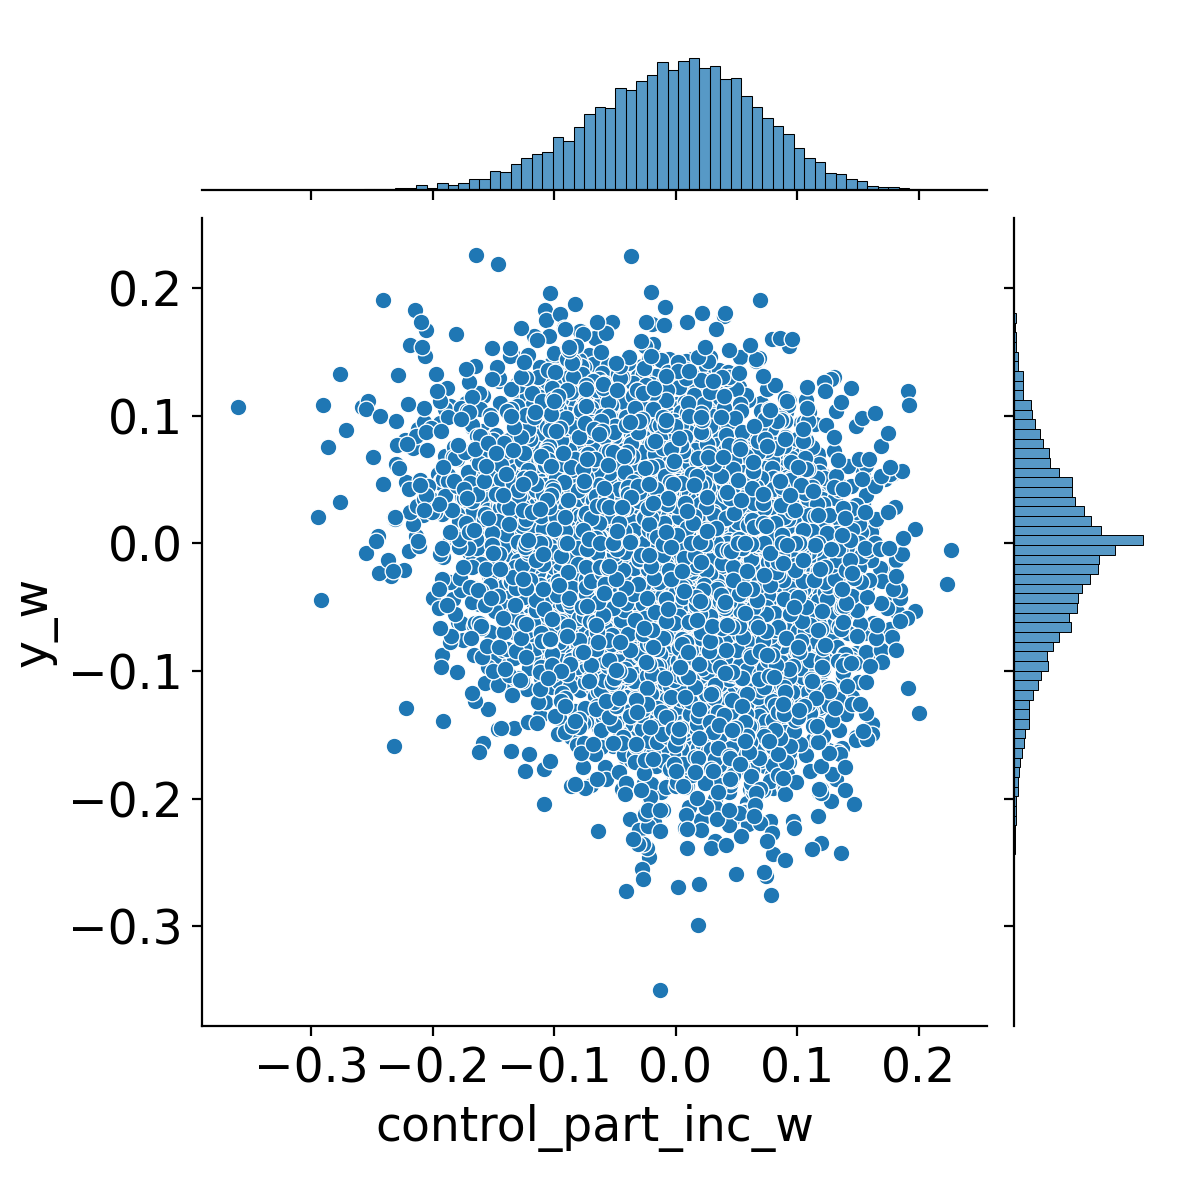

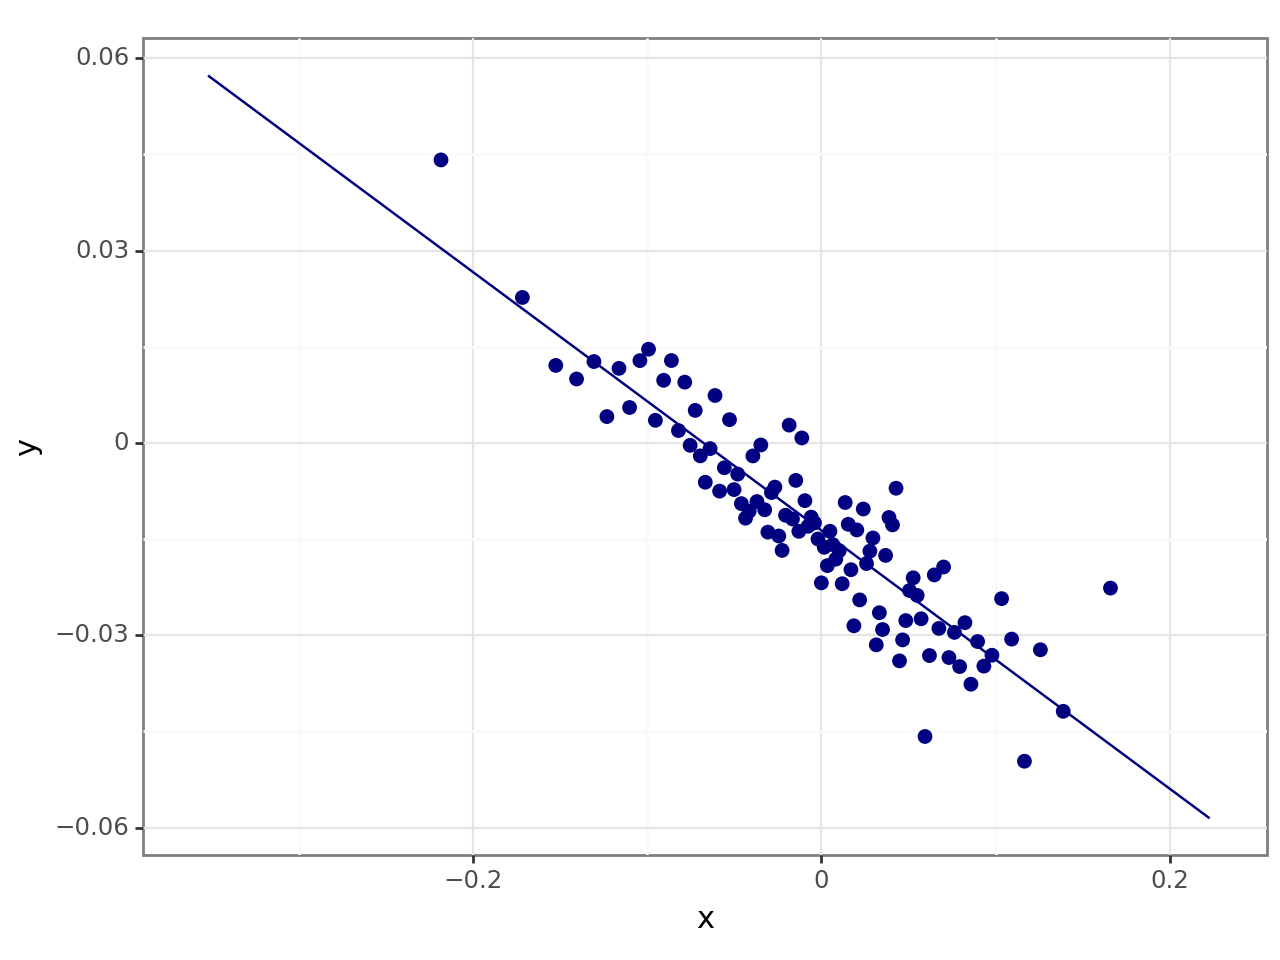


control_cons


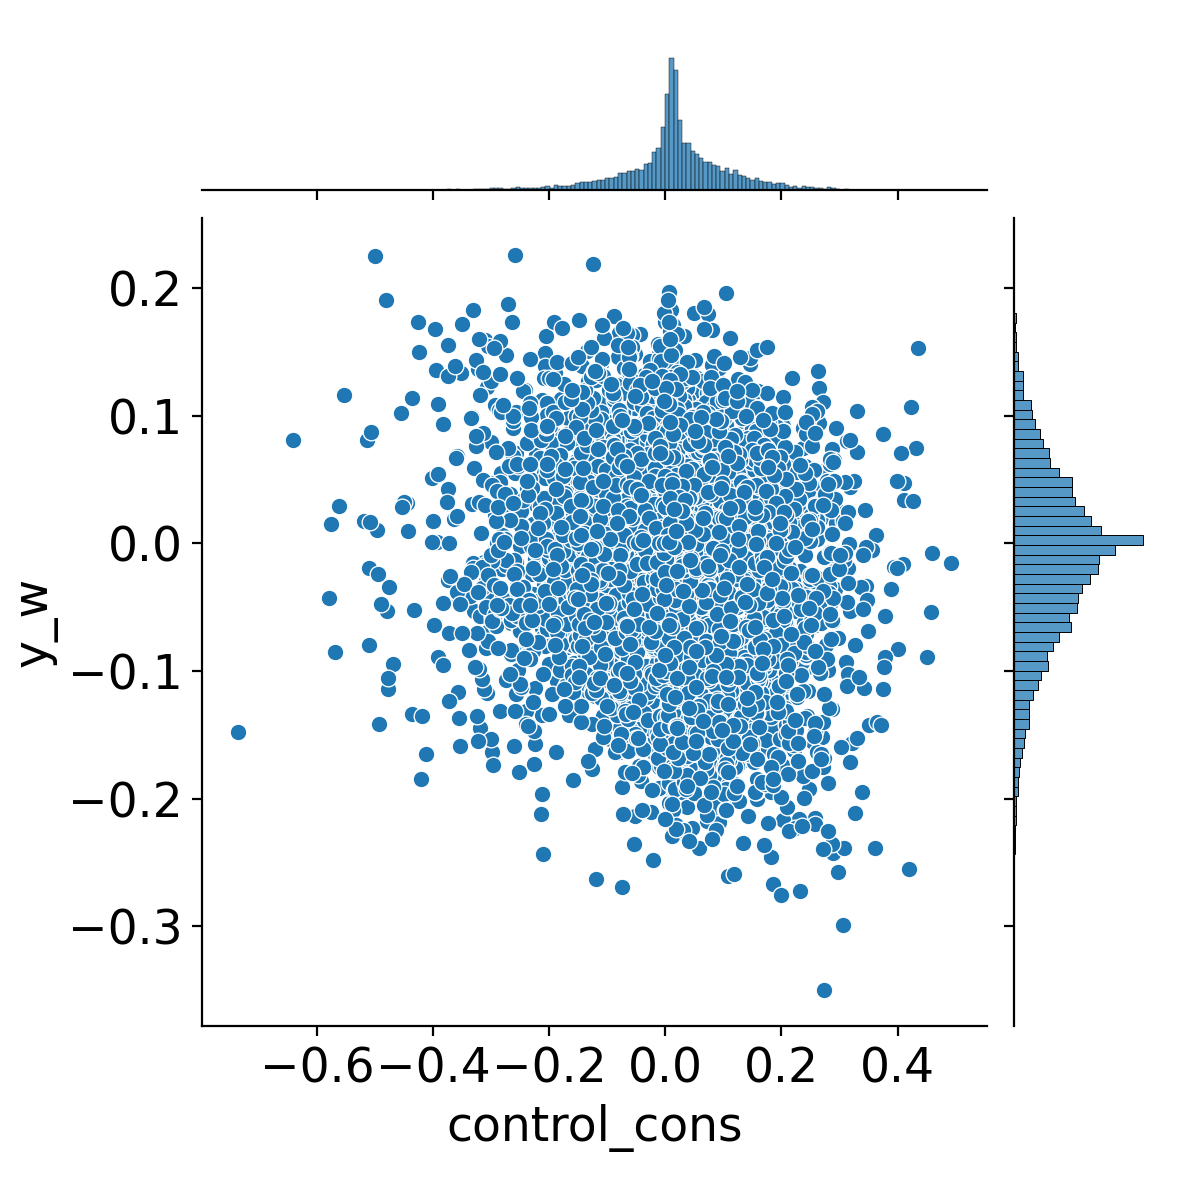

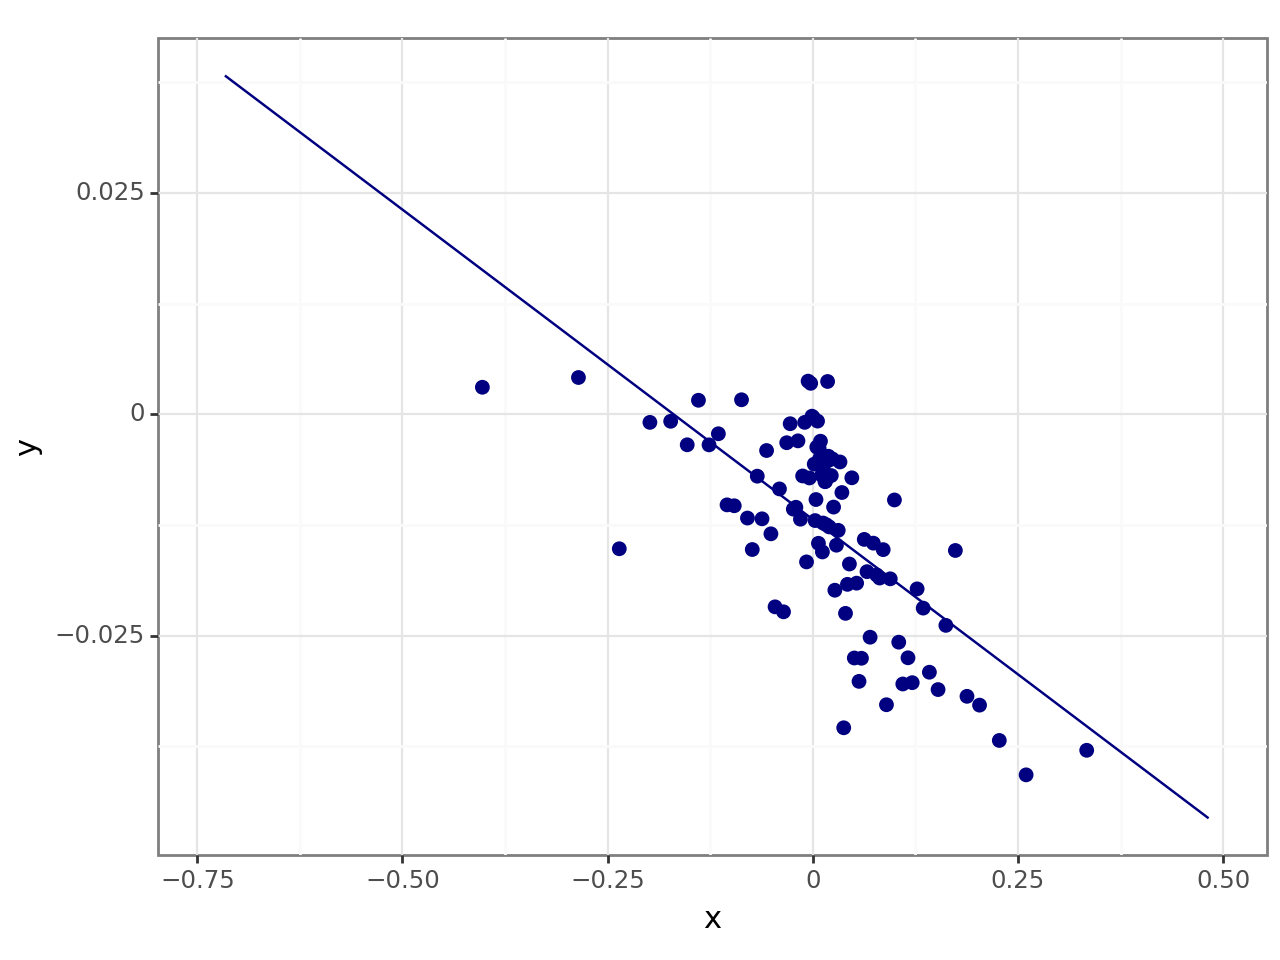


delta_log_fam_inc


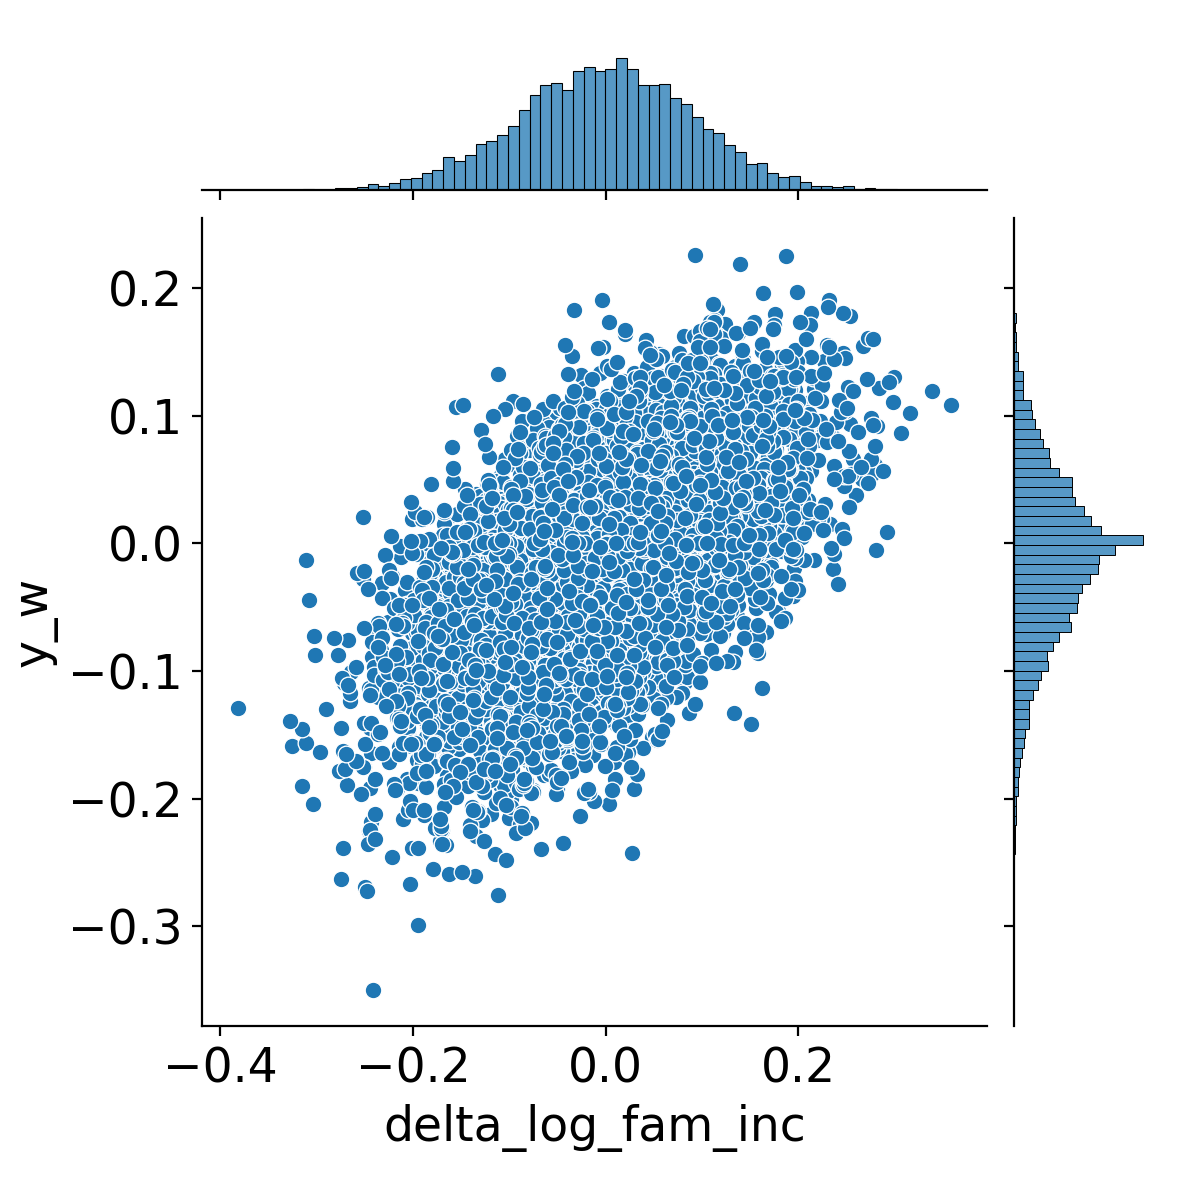

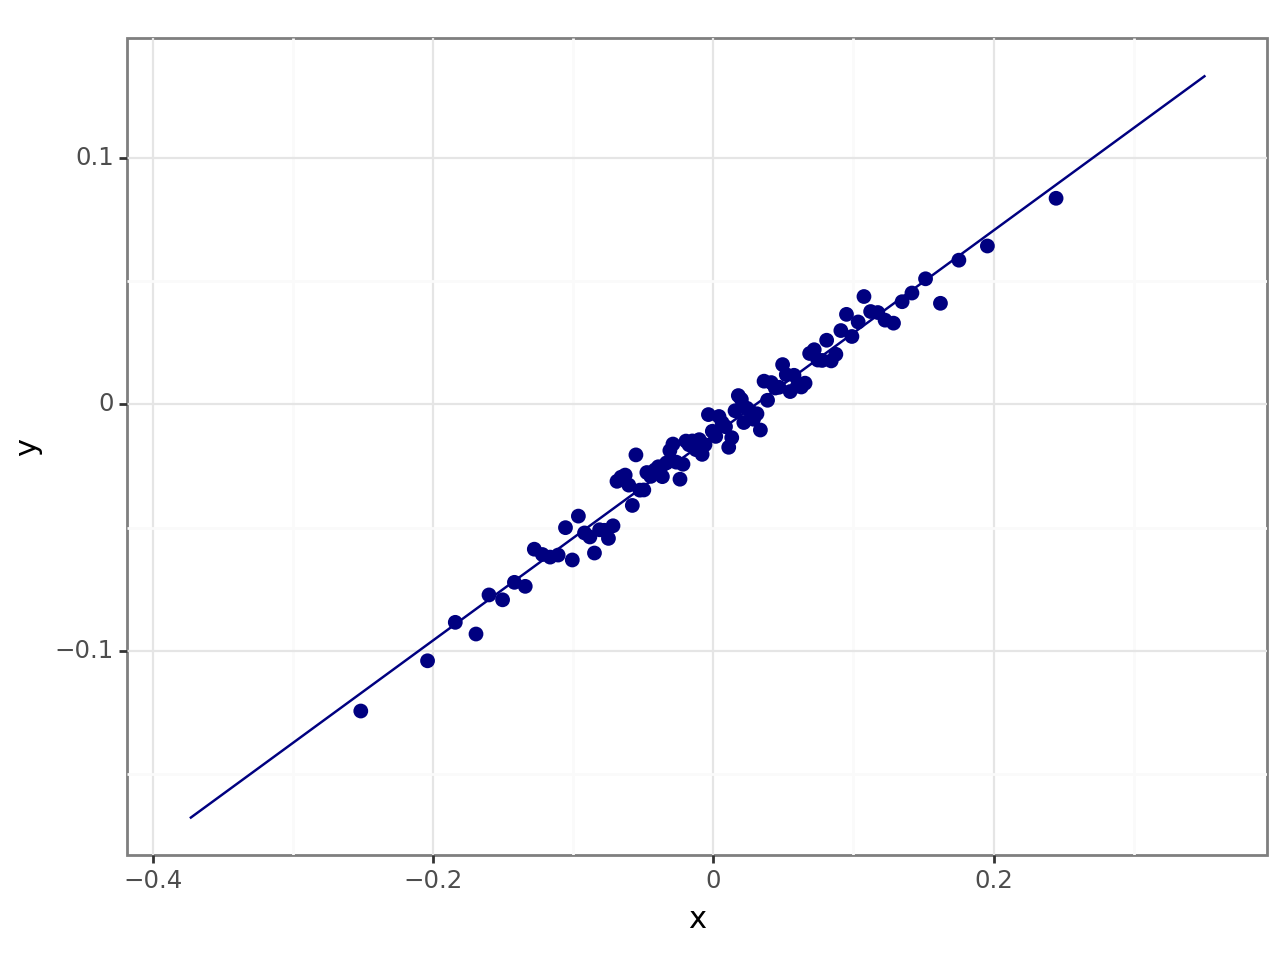


delta_log_wealth


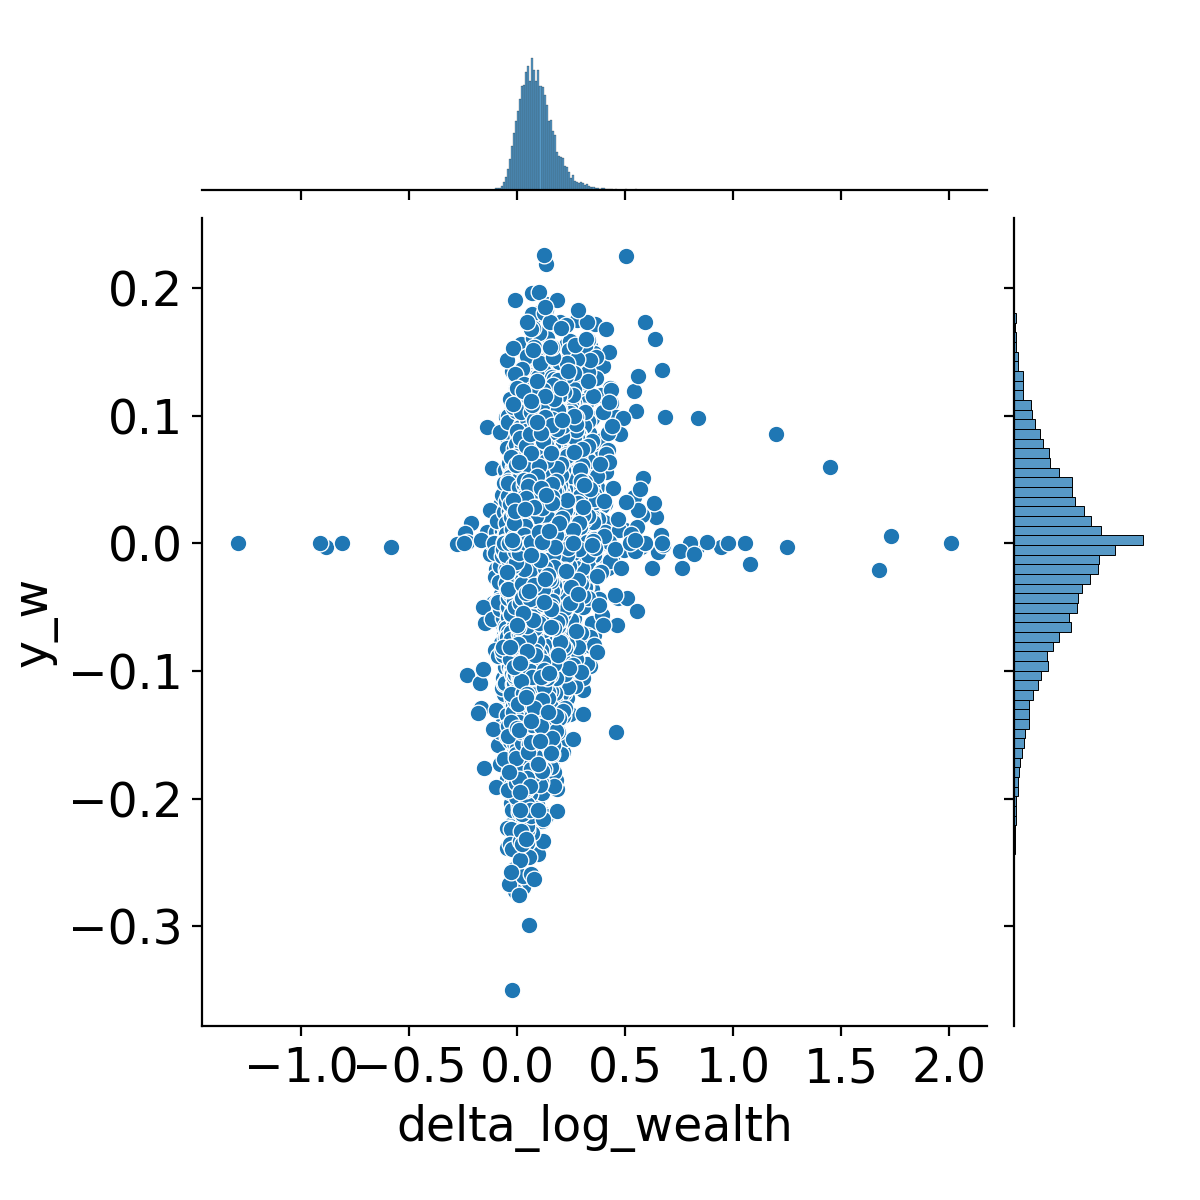

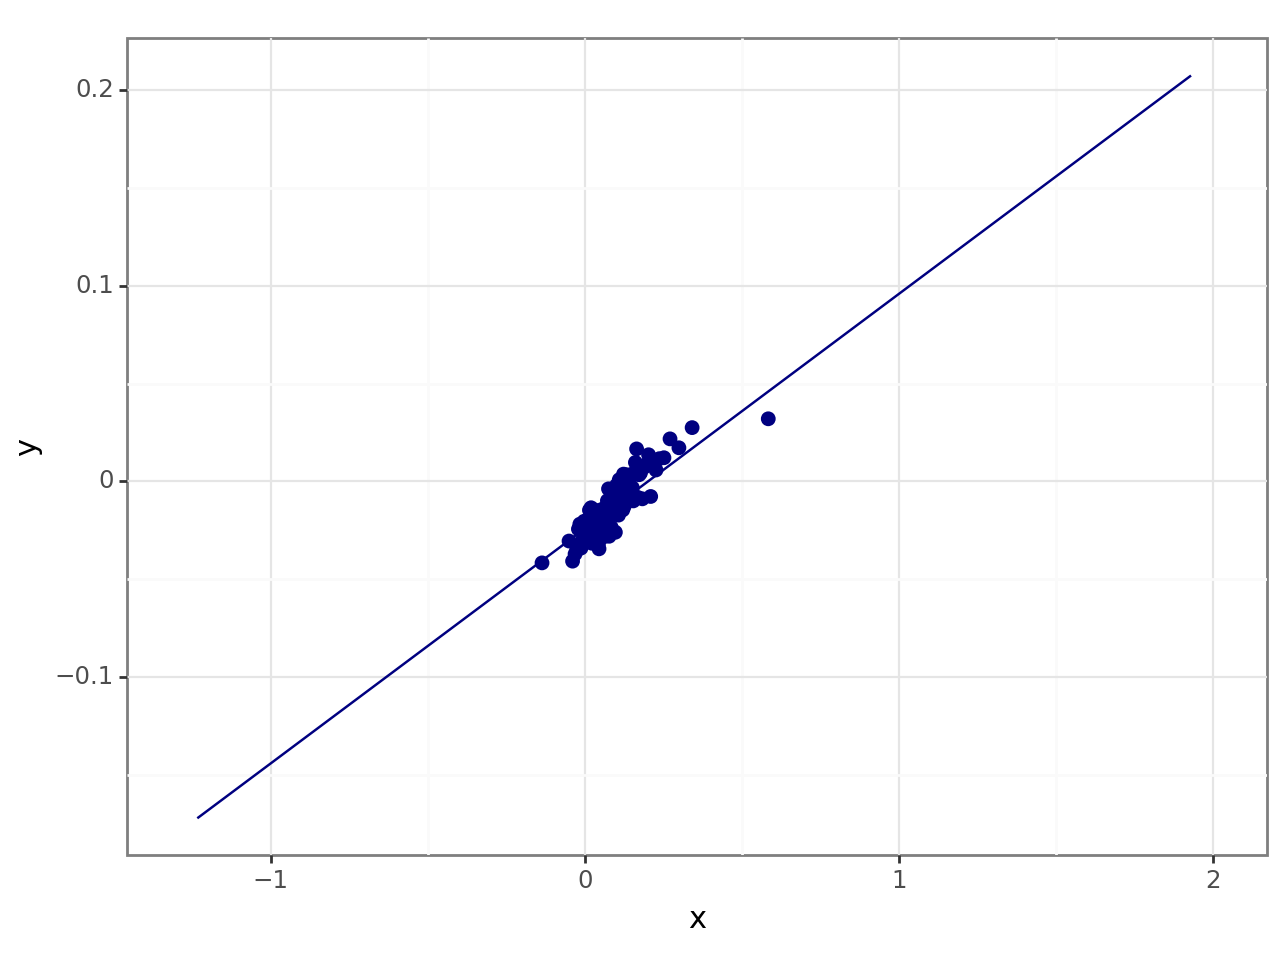


log_fam_inc_l


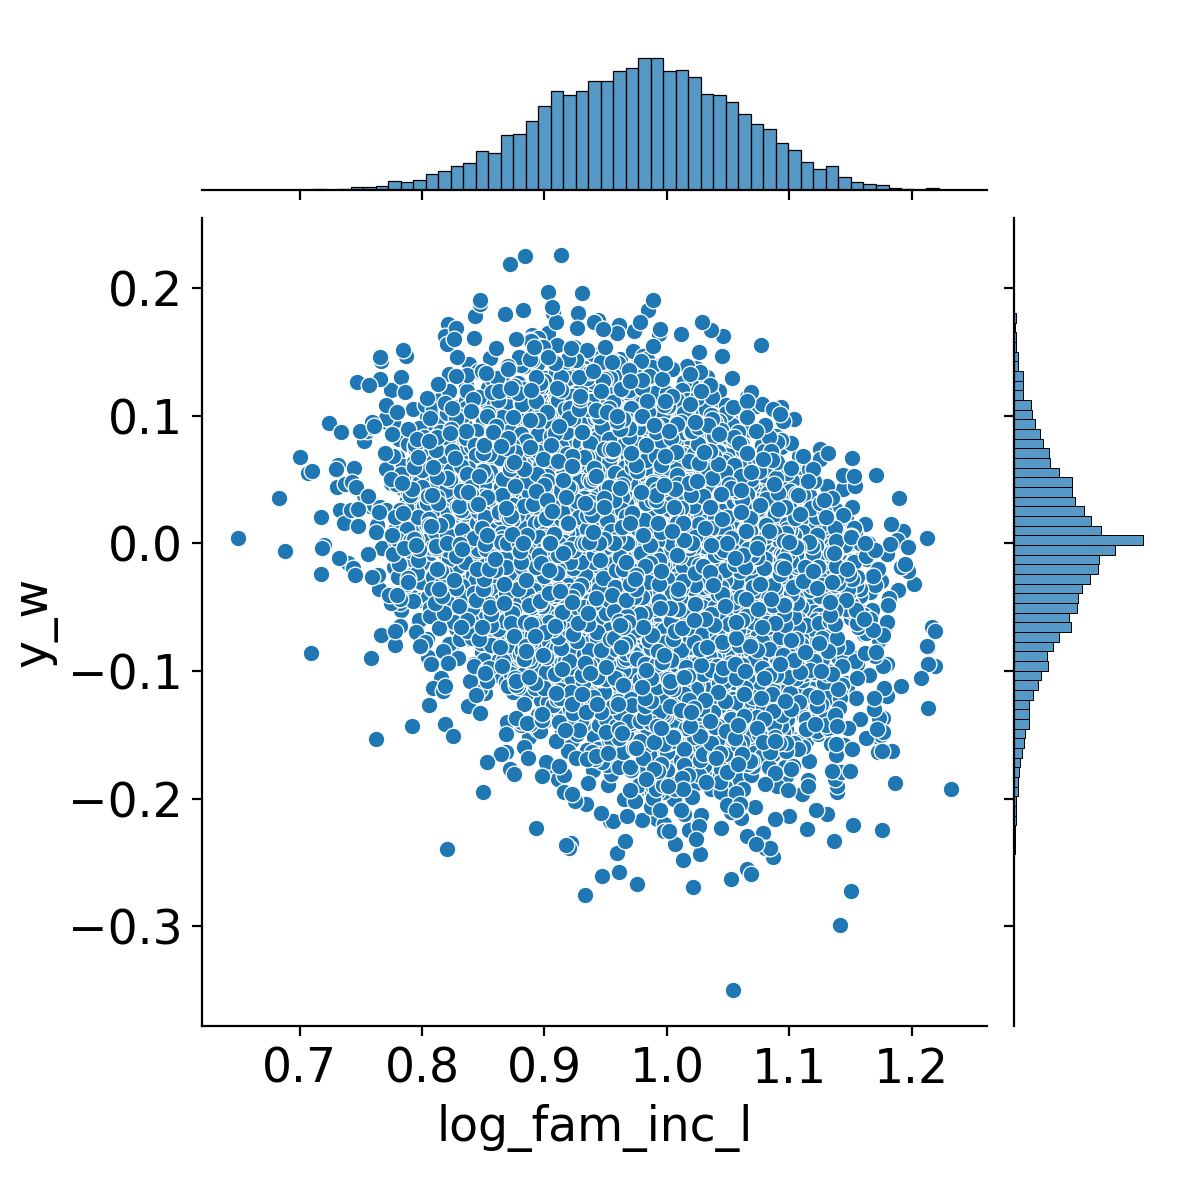

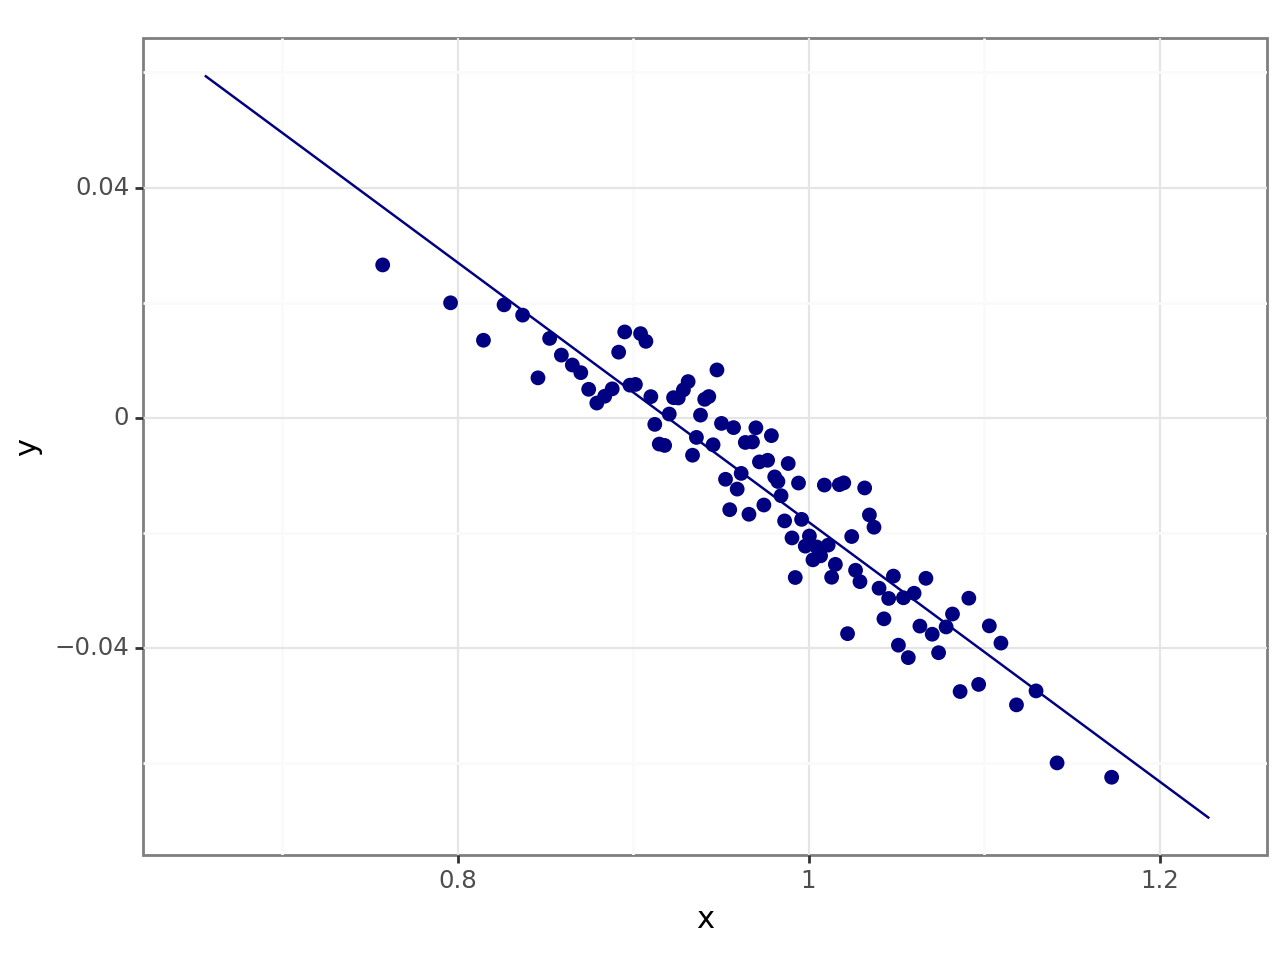


log_wealth_l


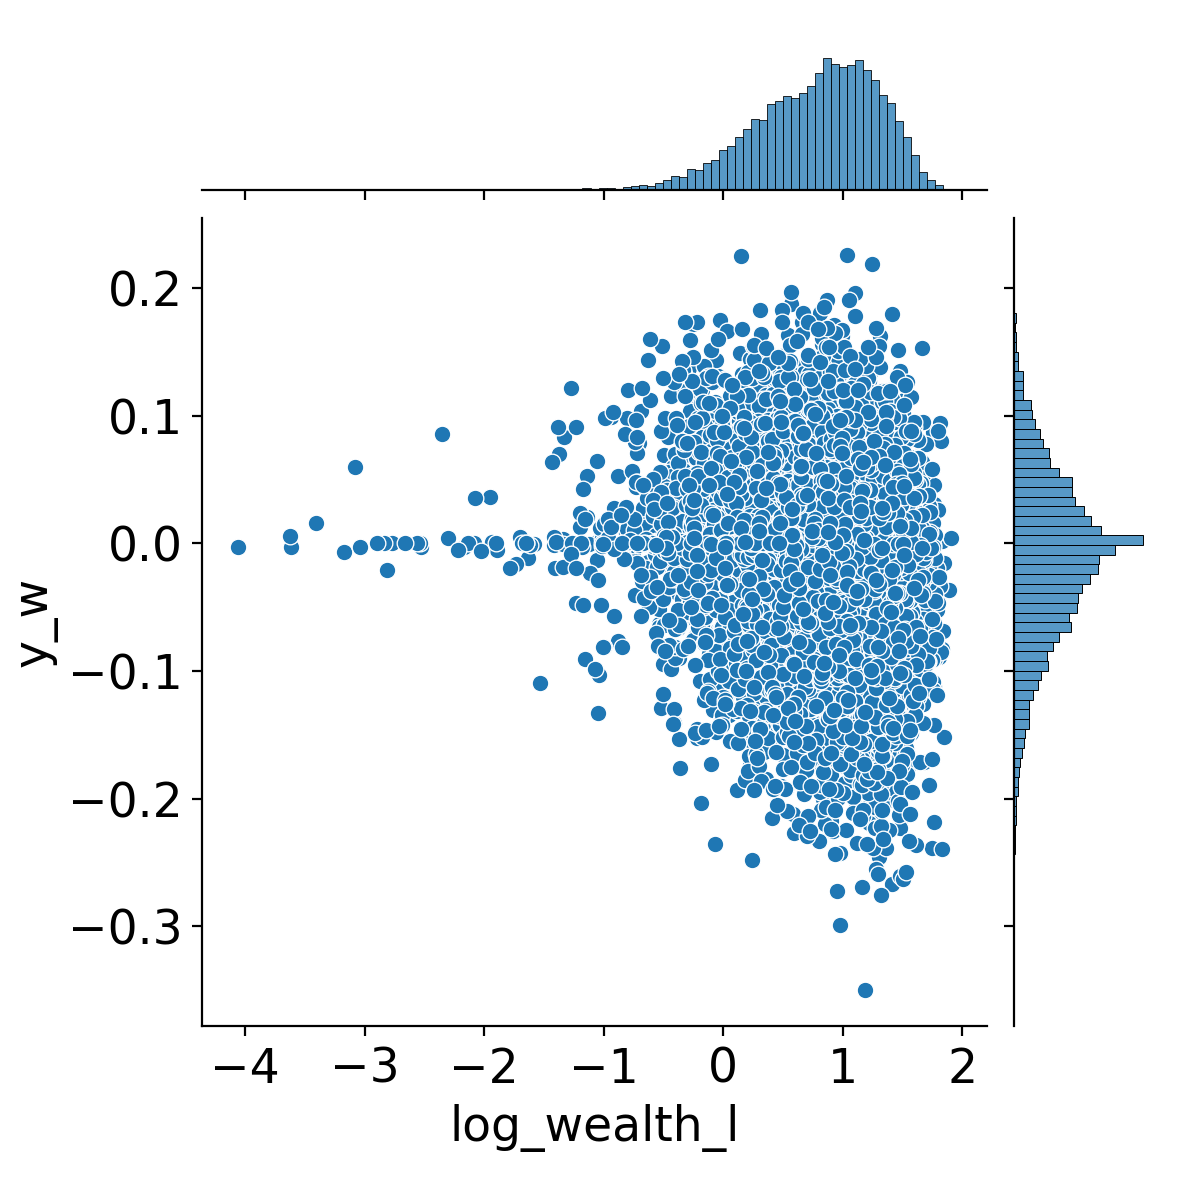

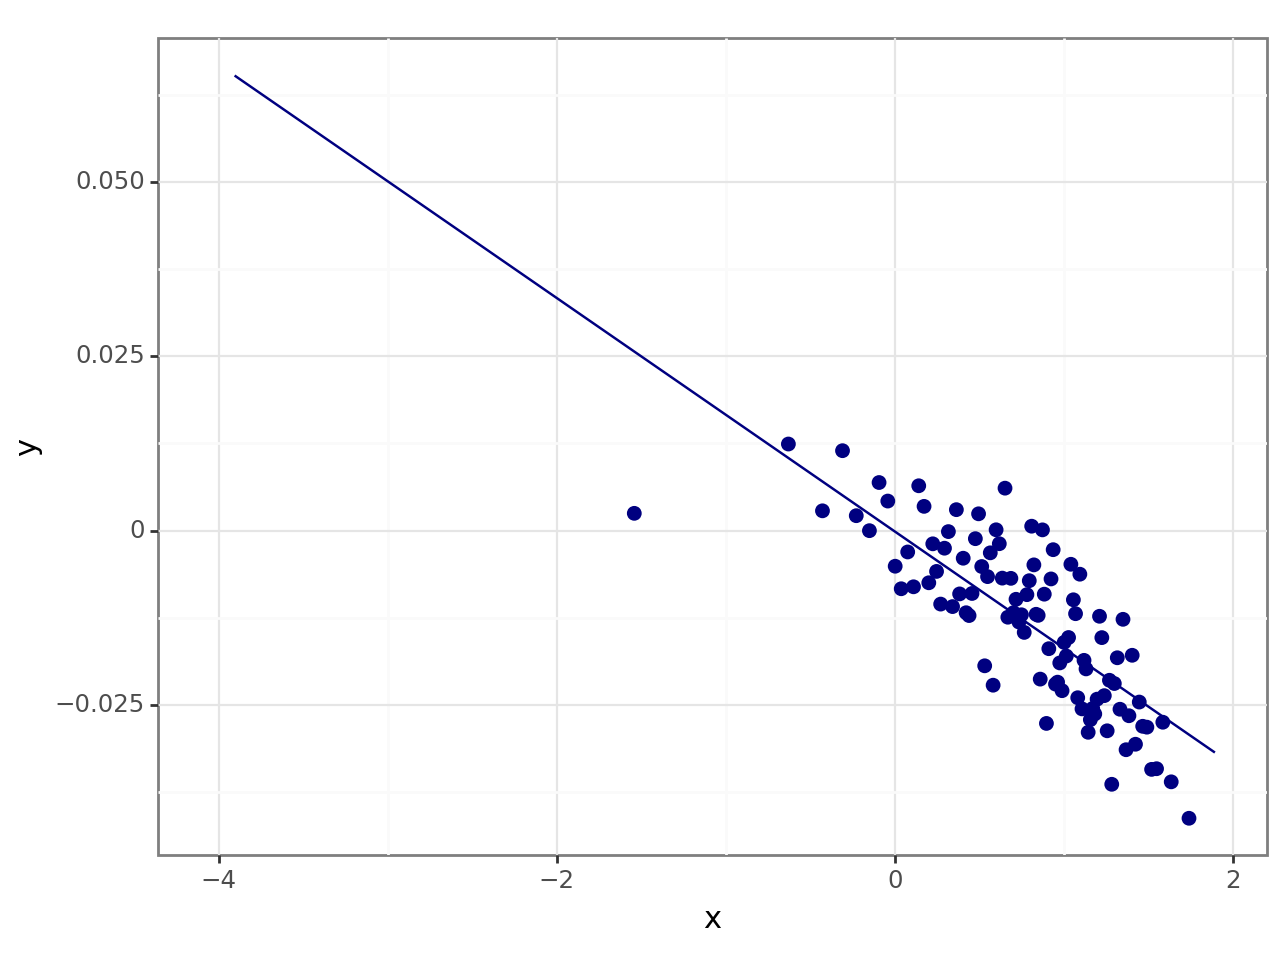


wage_shock


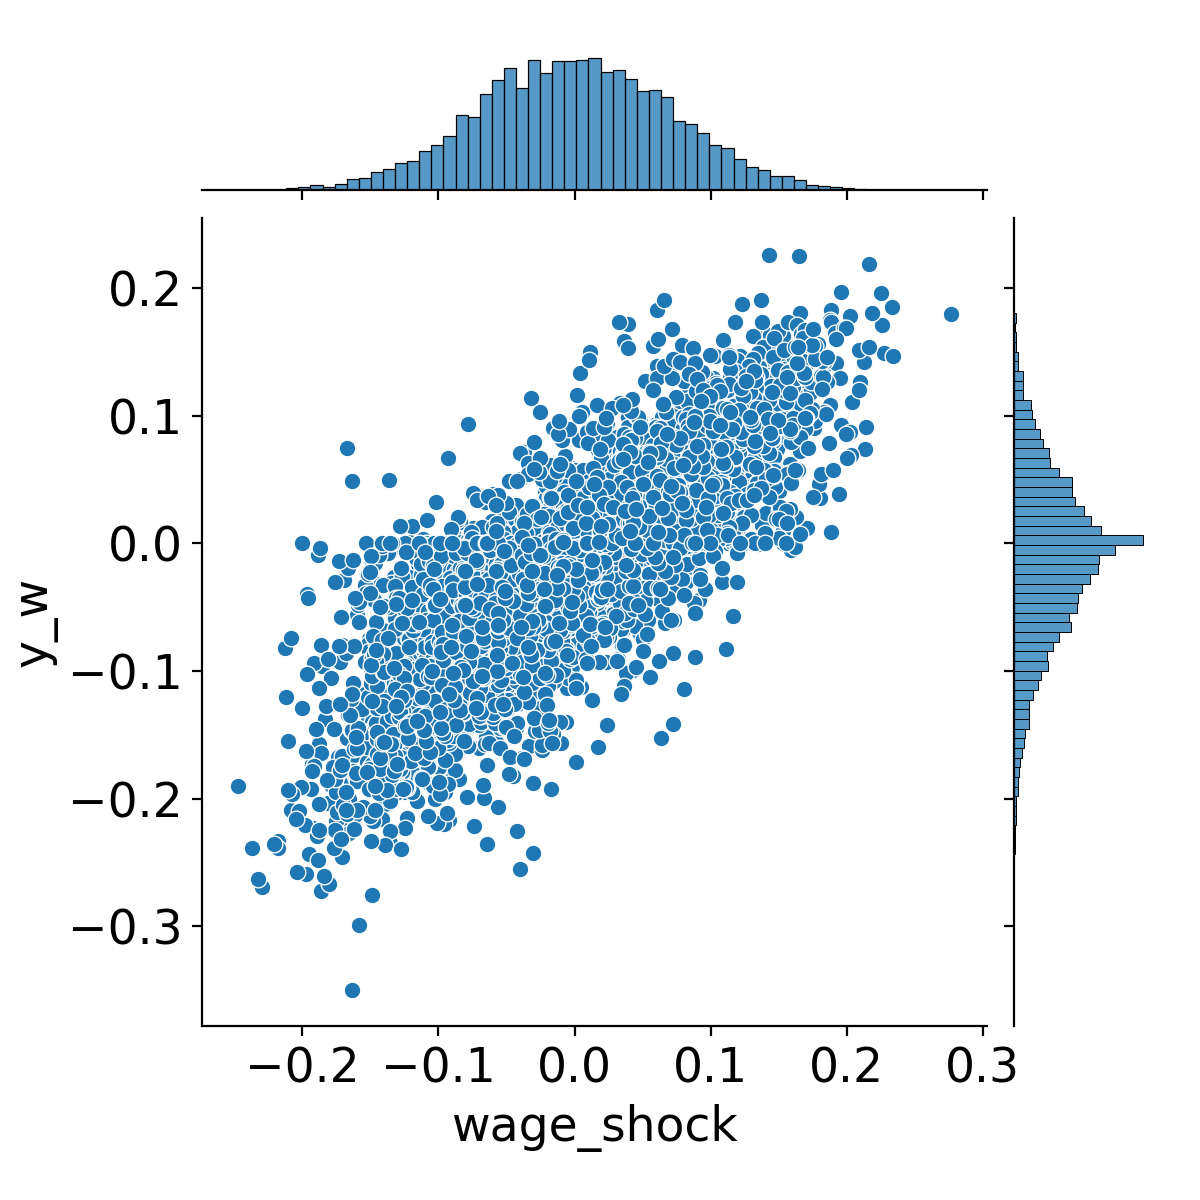

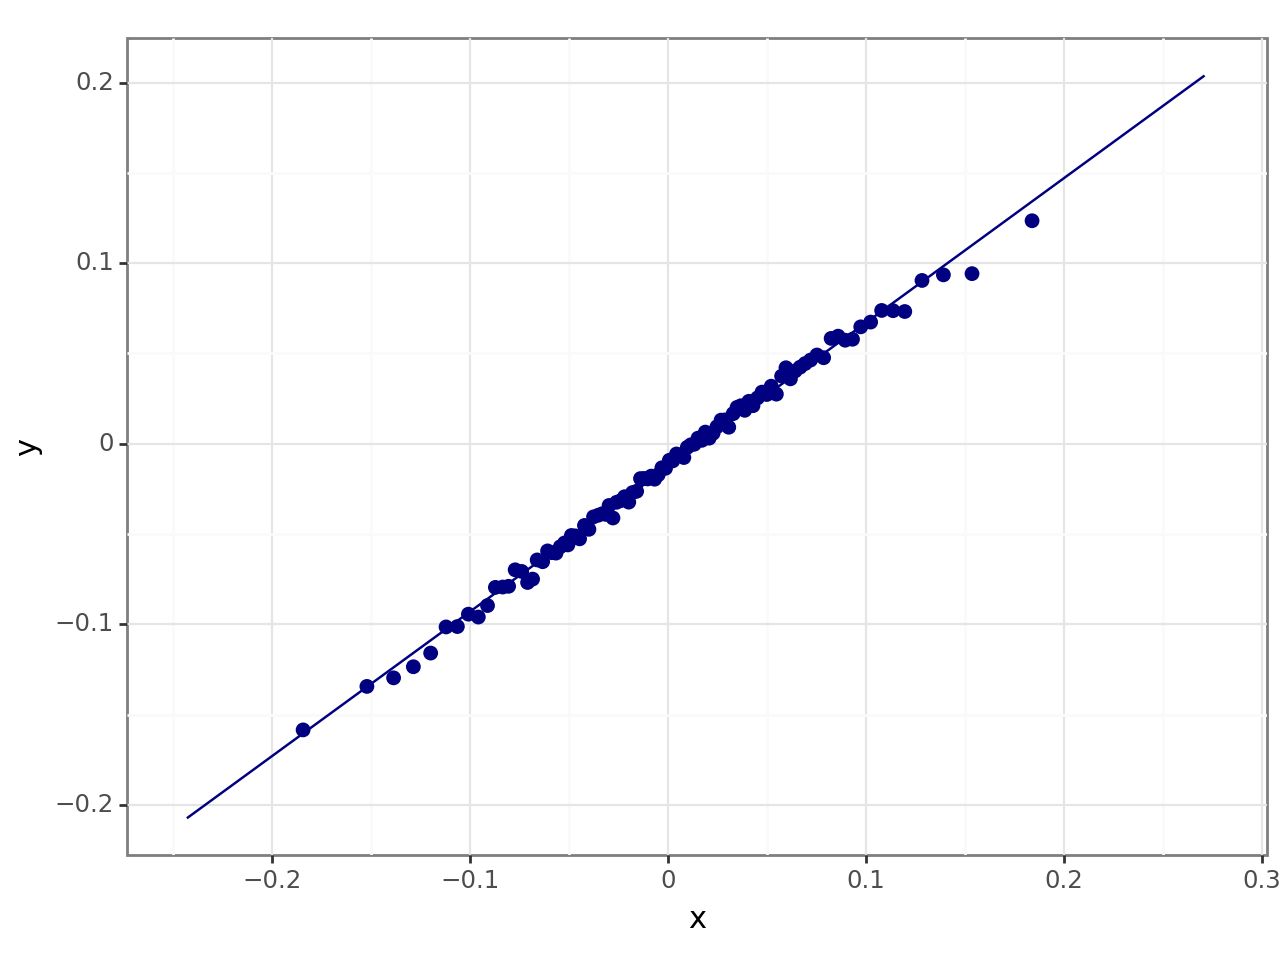


wage_shock_l


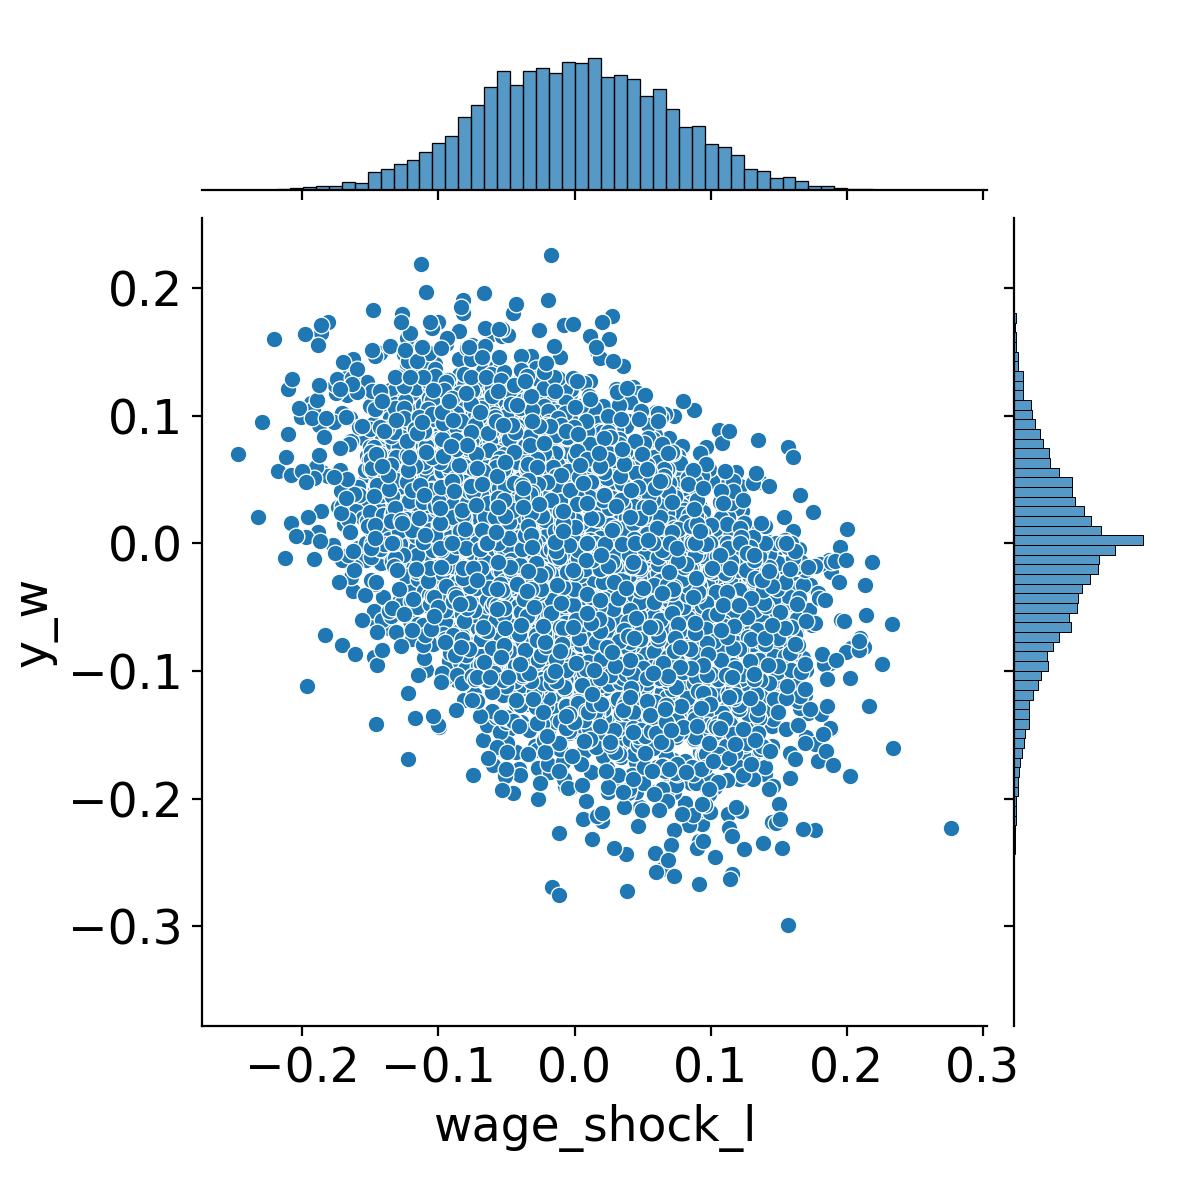

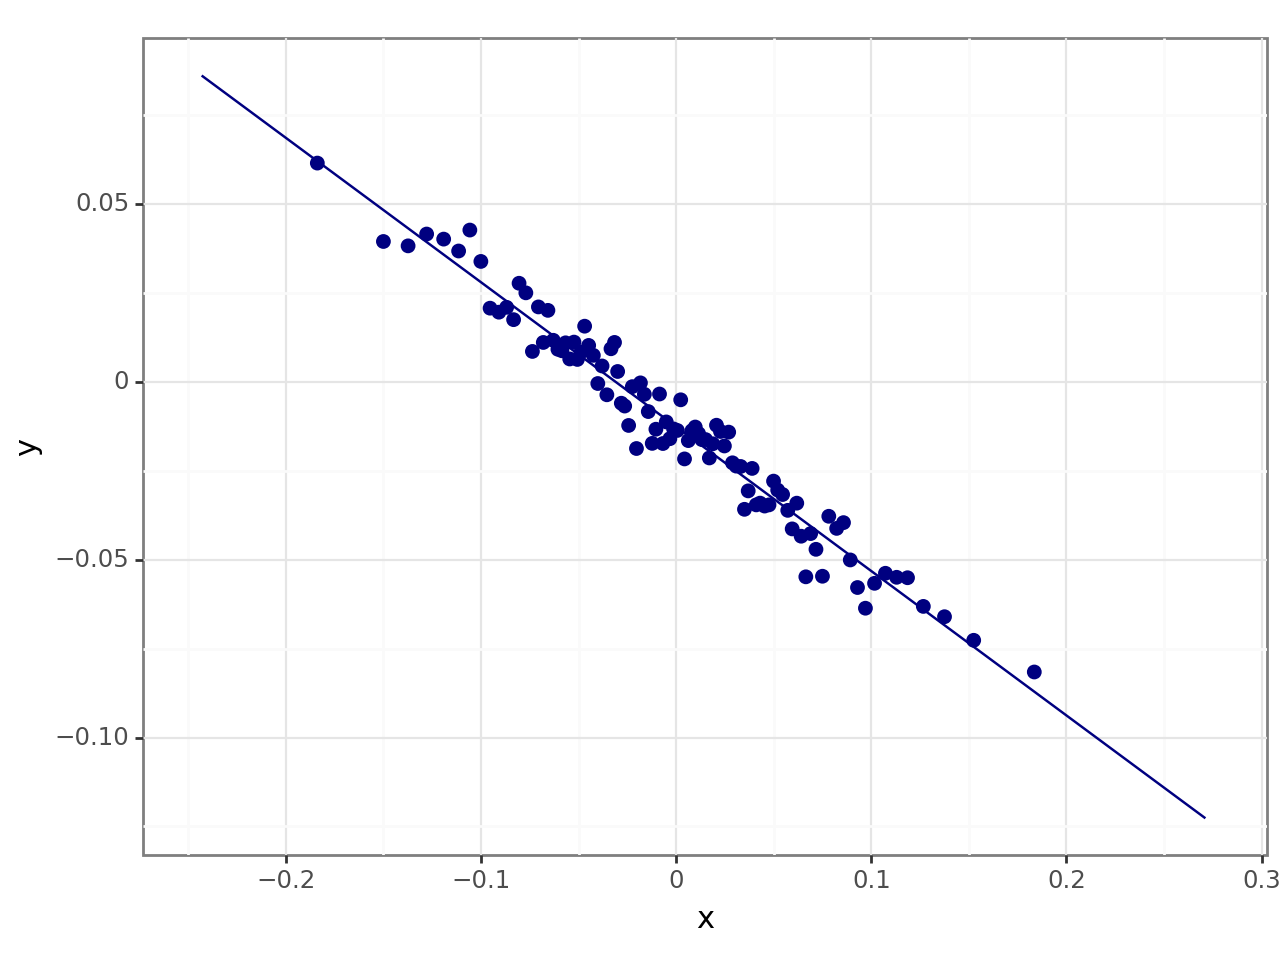


wage_shock_l2


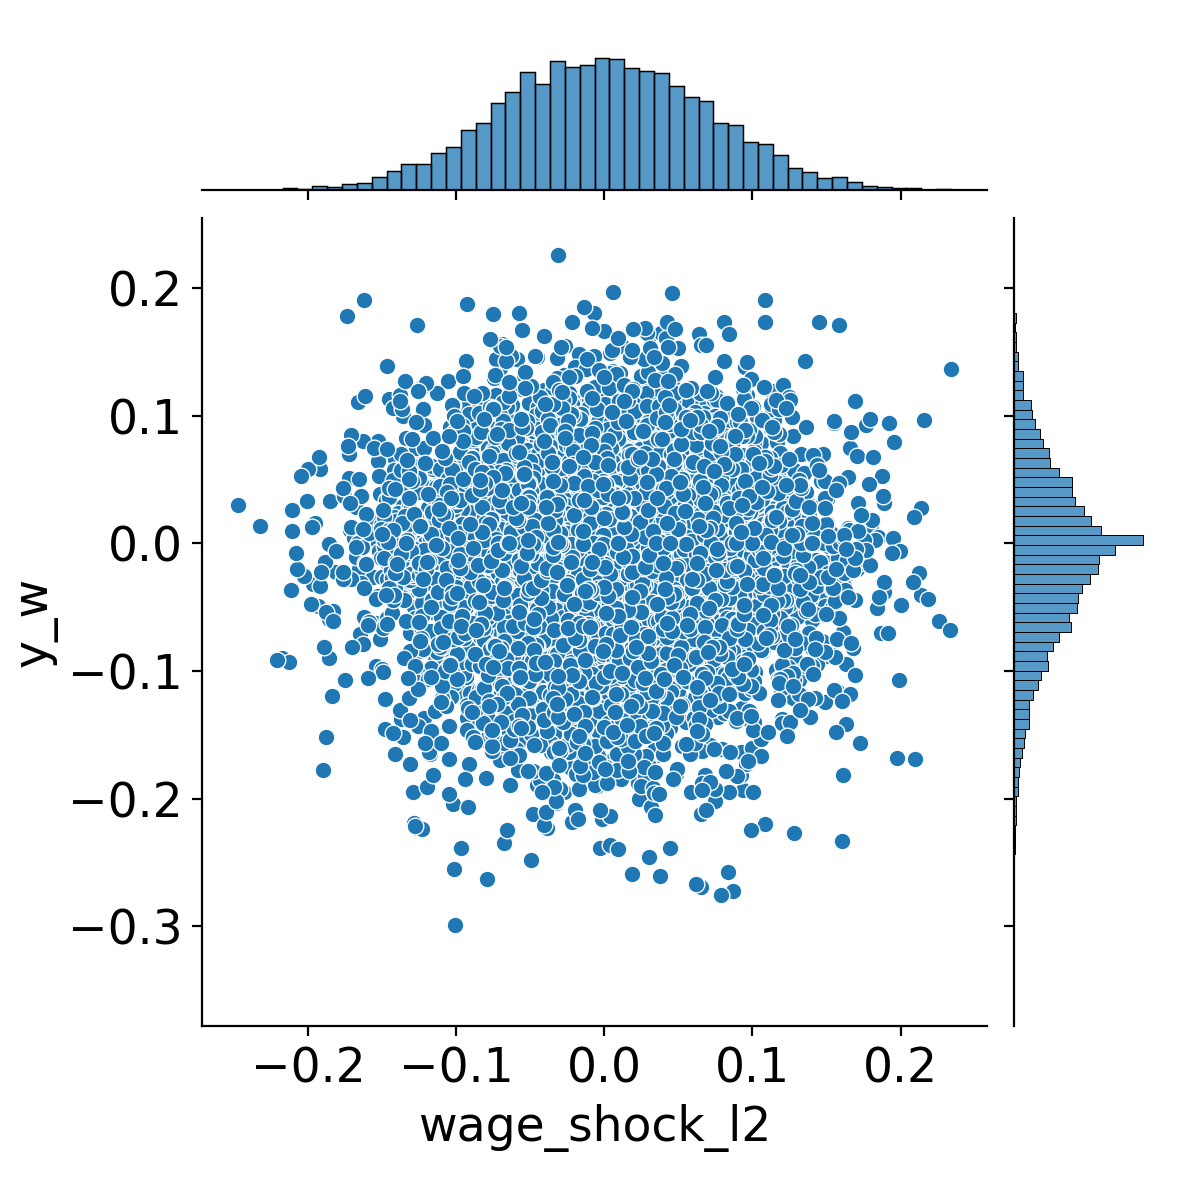

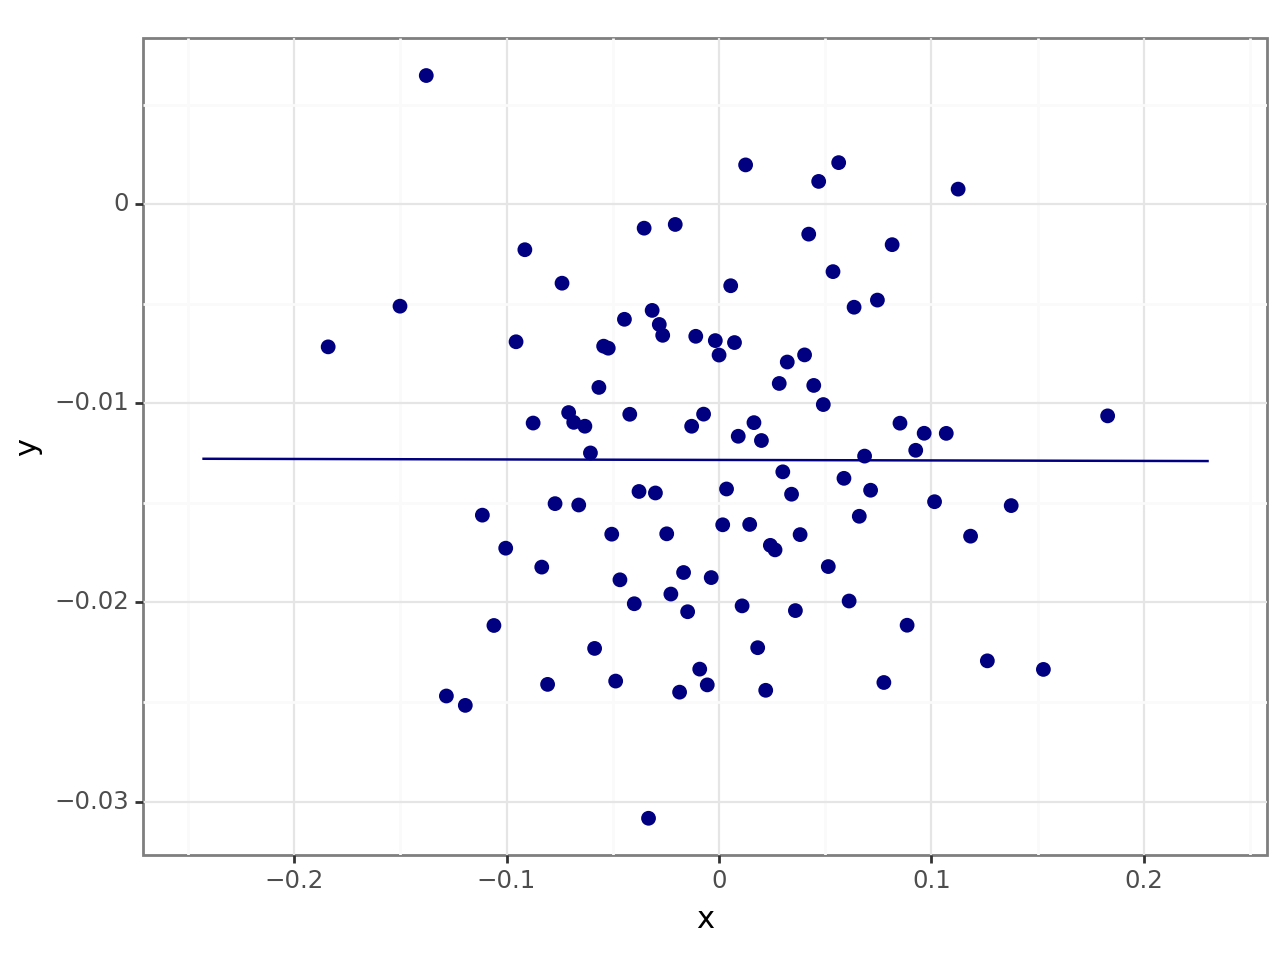


wage_shock_j


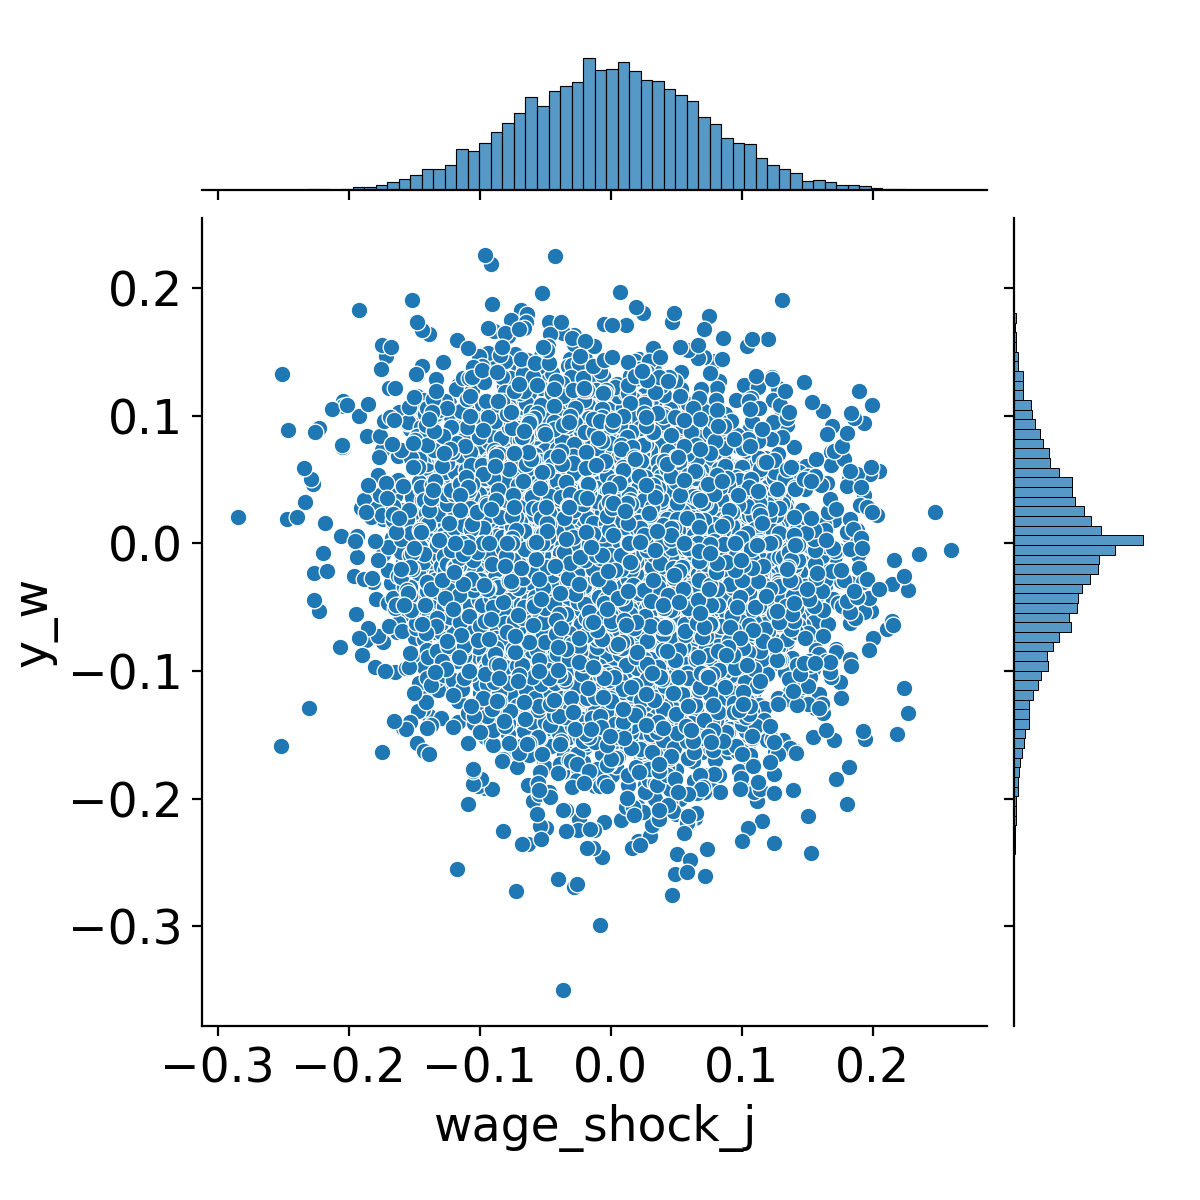

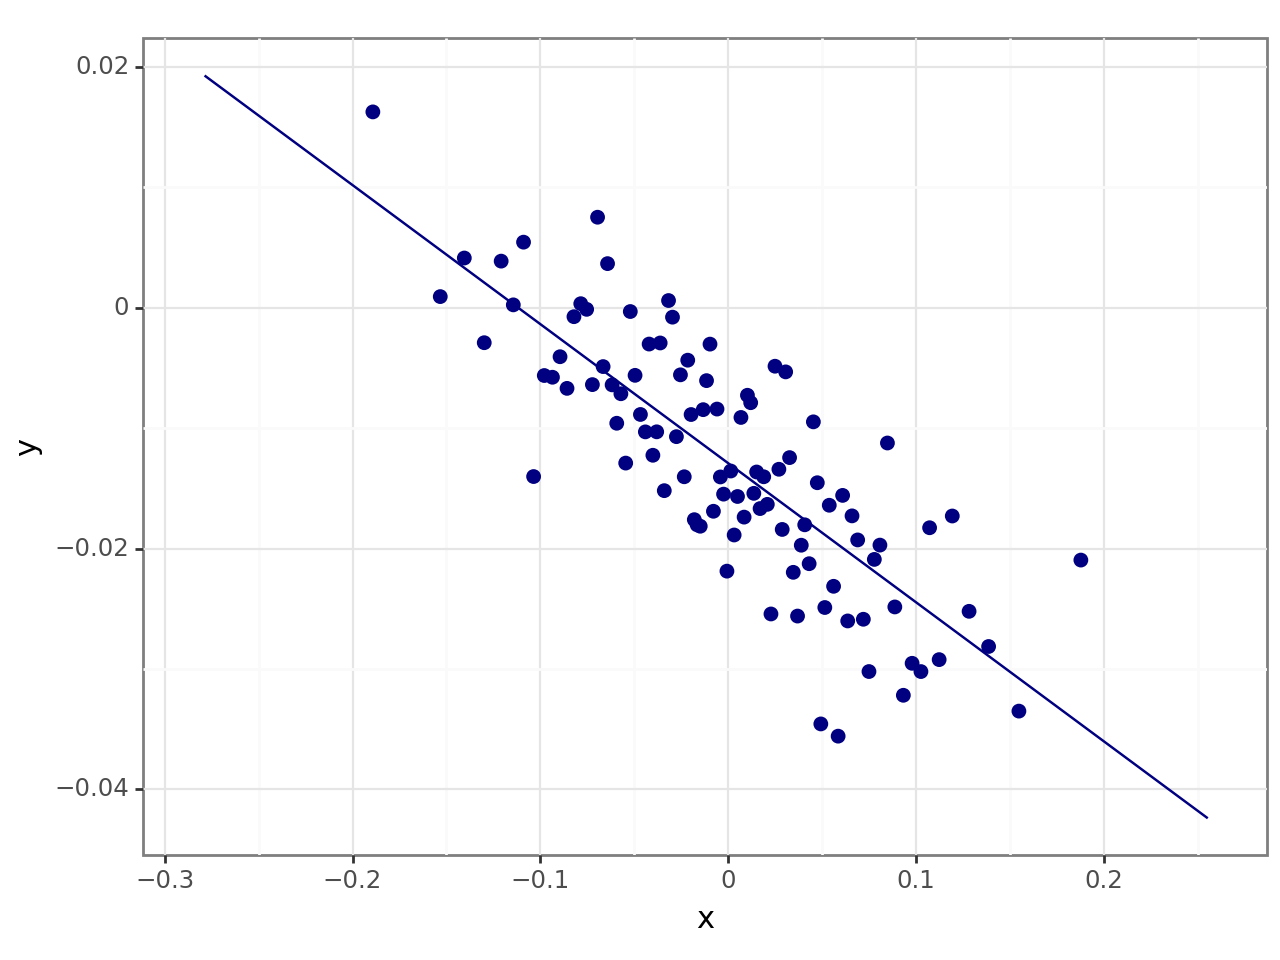


wage_shock_j_l


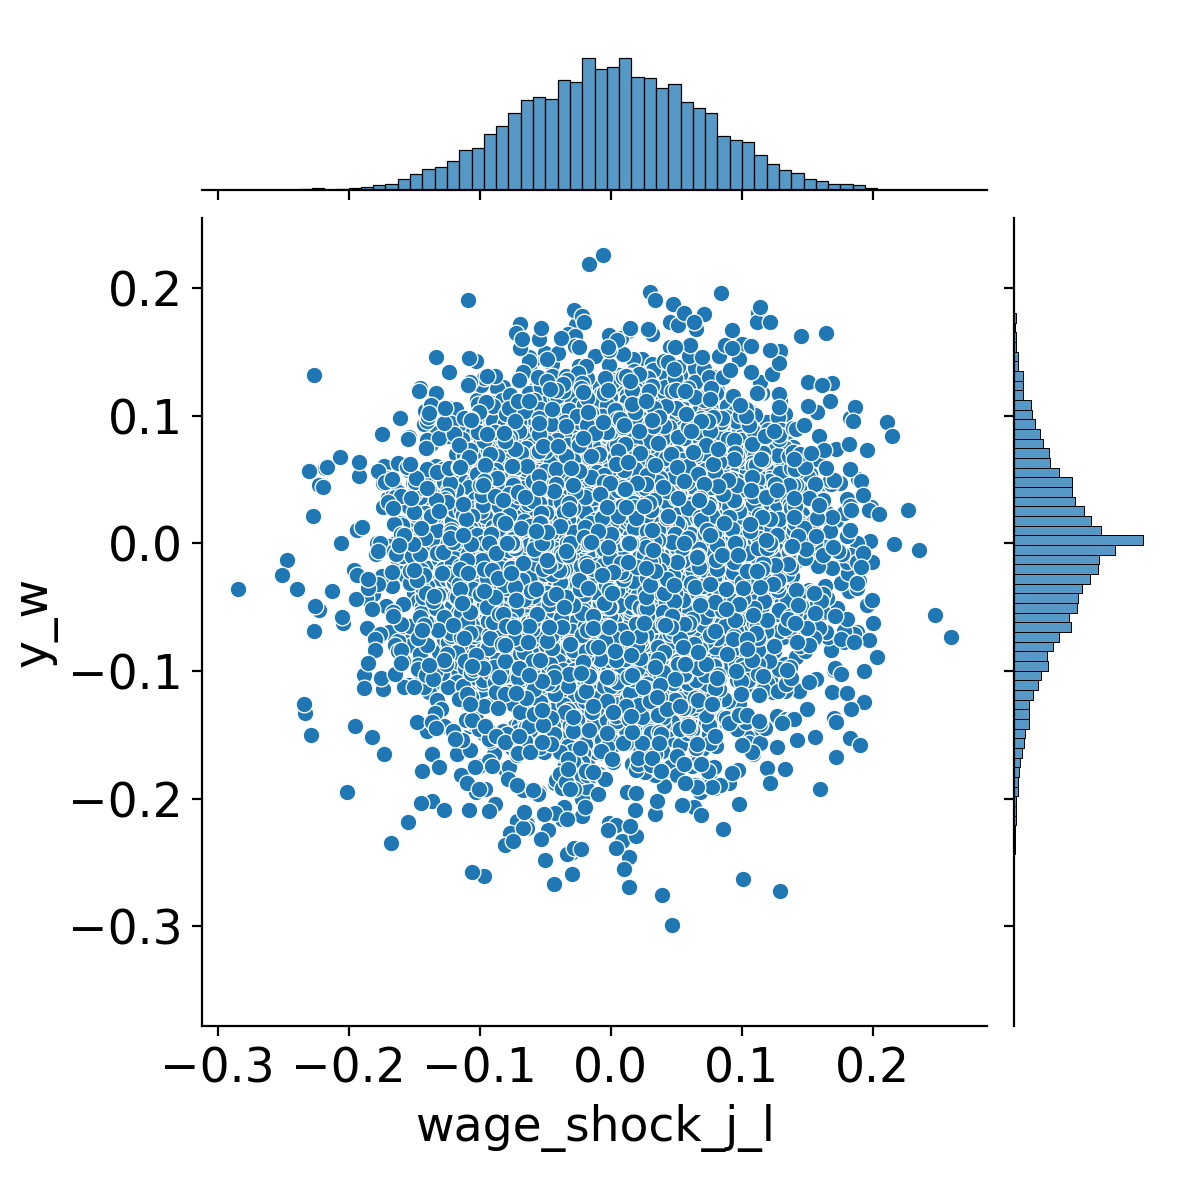

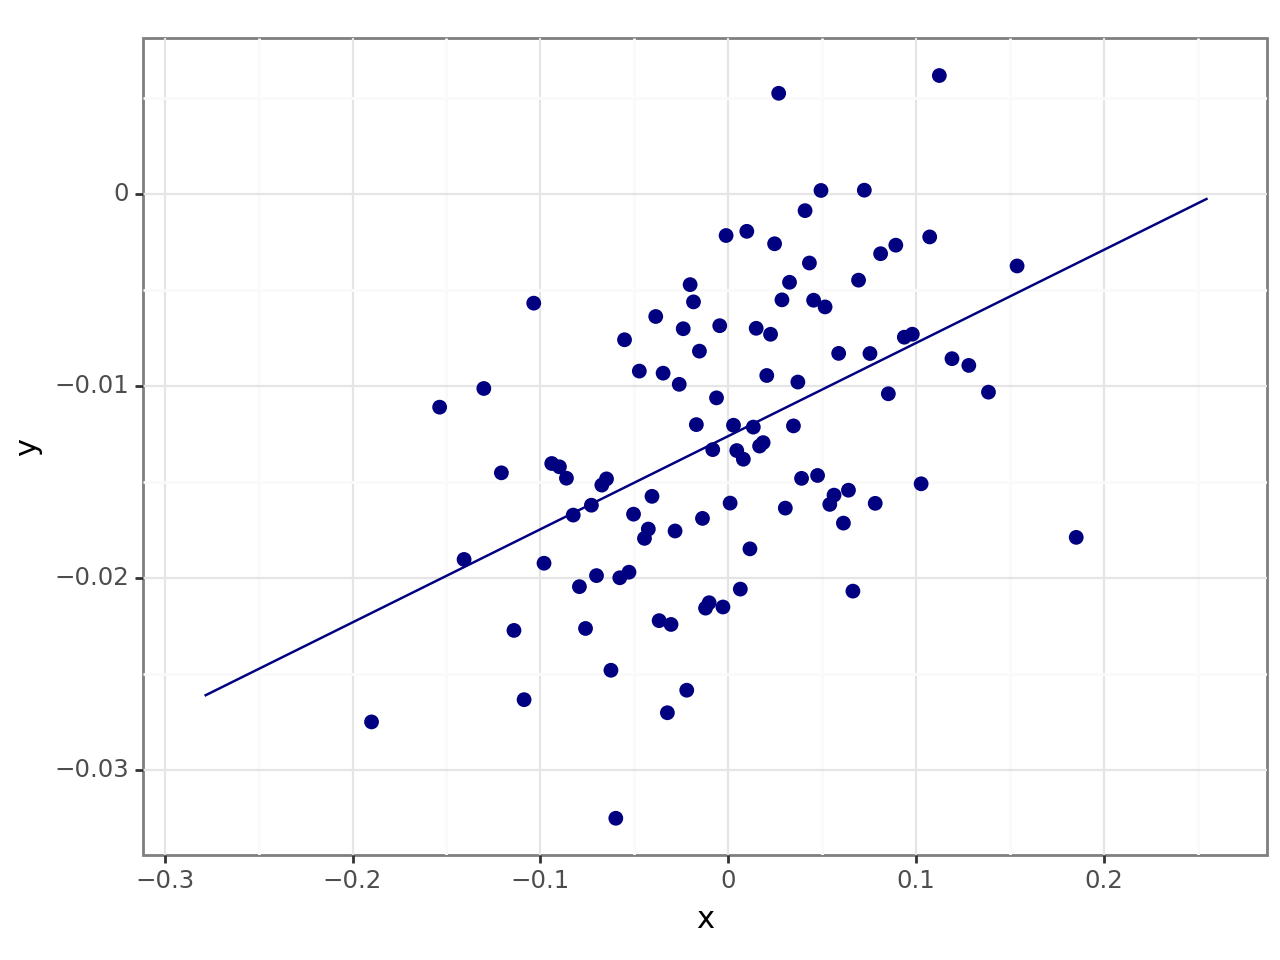


wage_shock_j_l2


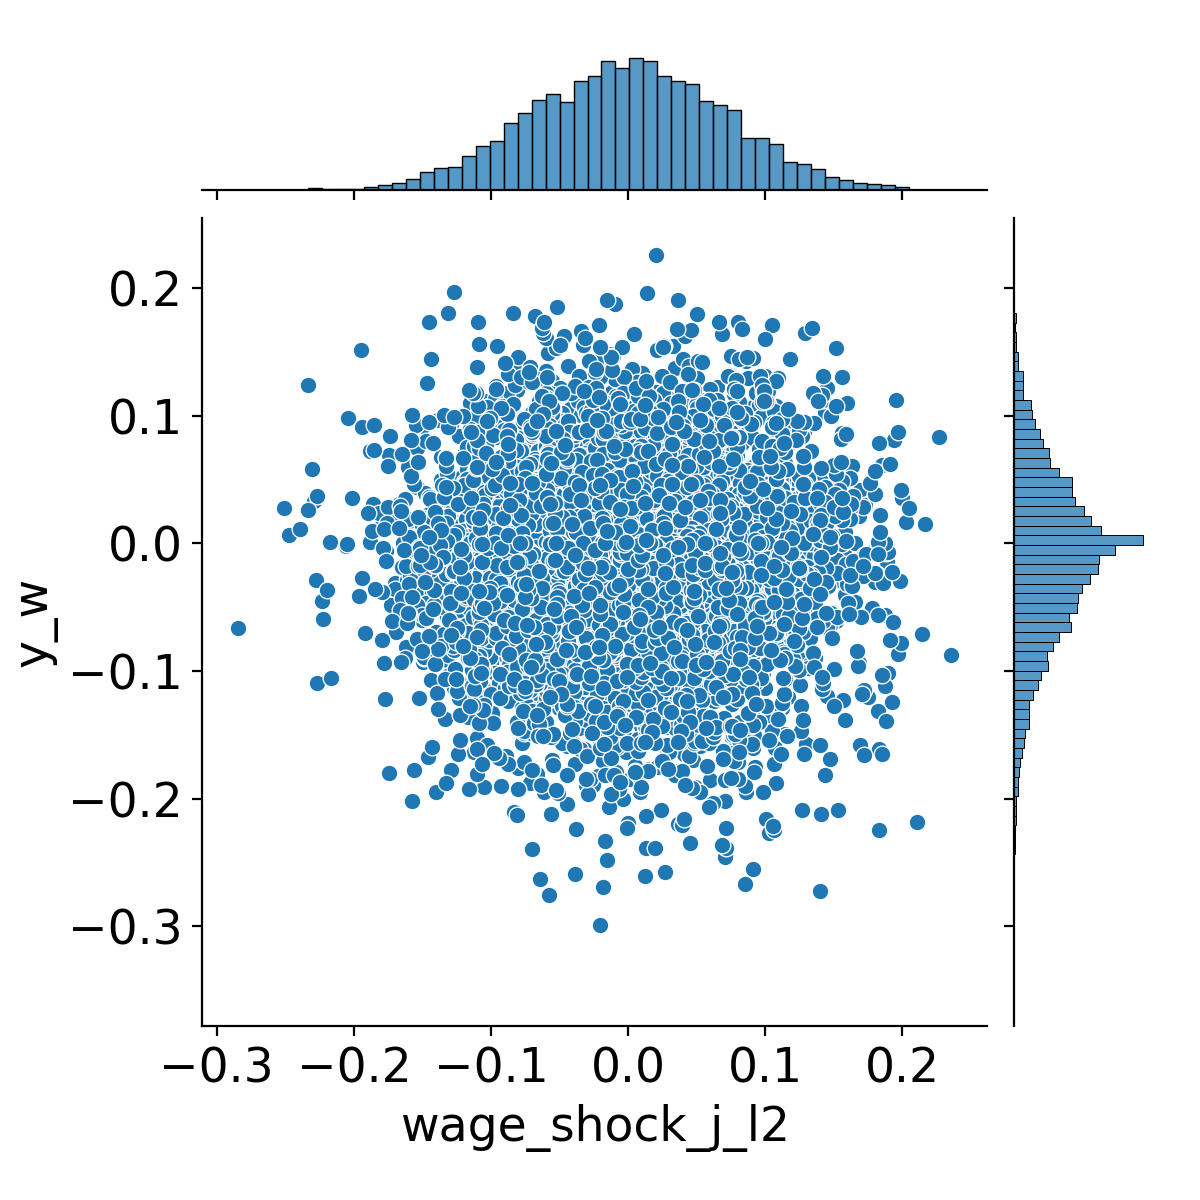

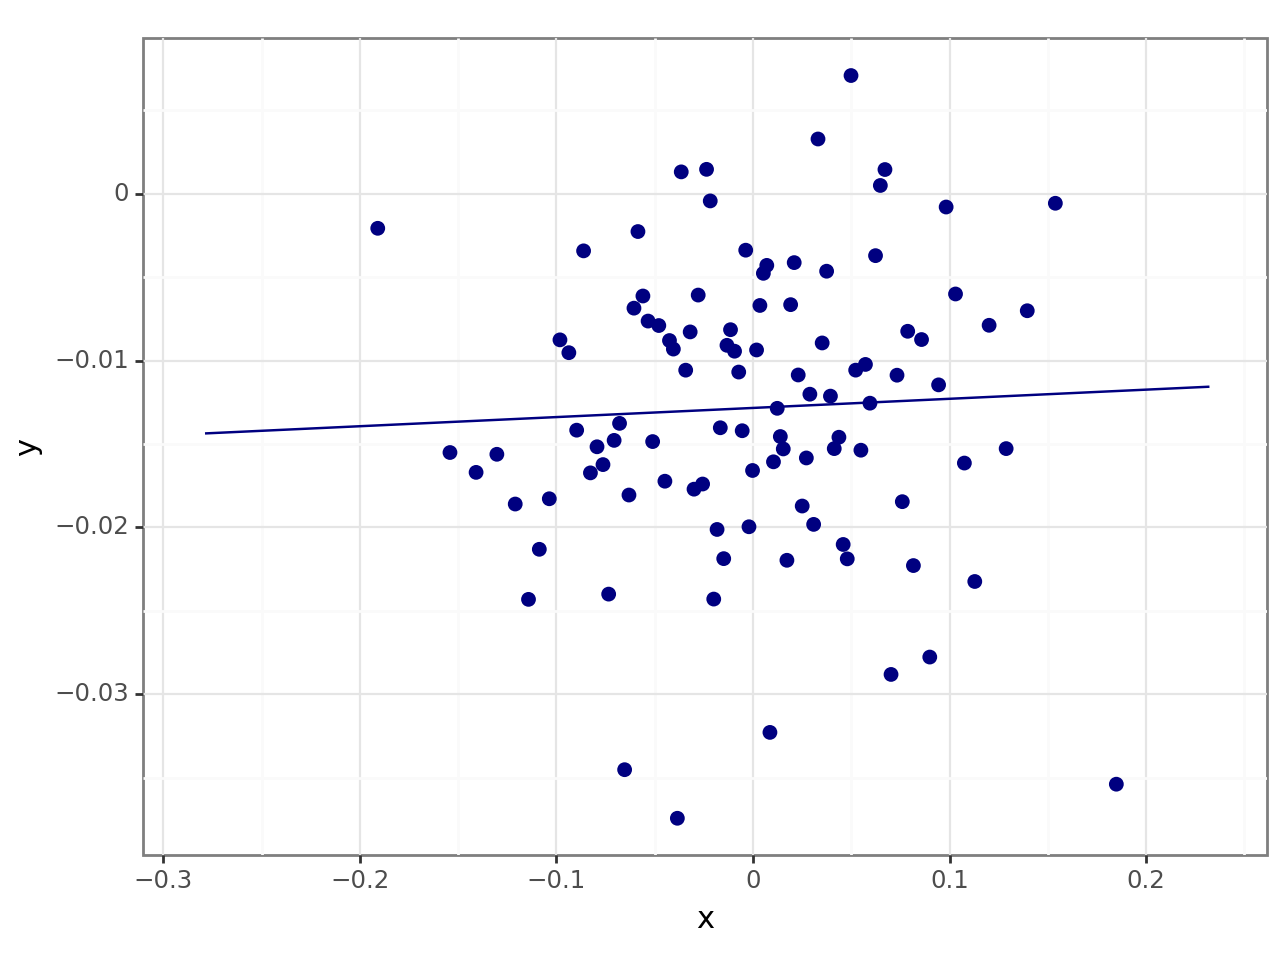


delta_log_wealth_l


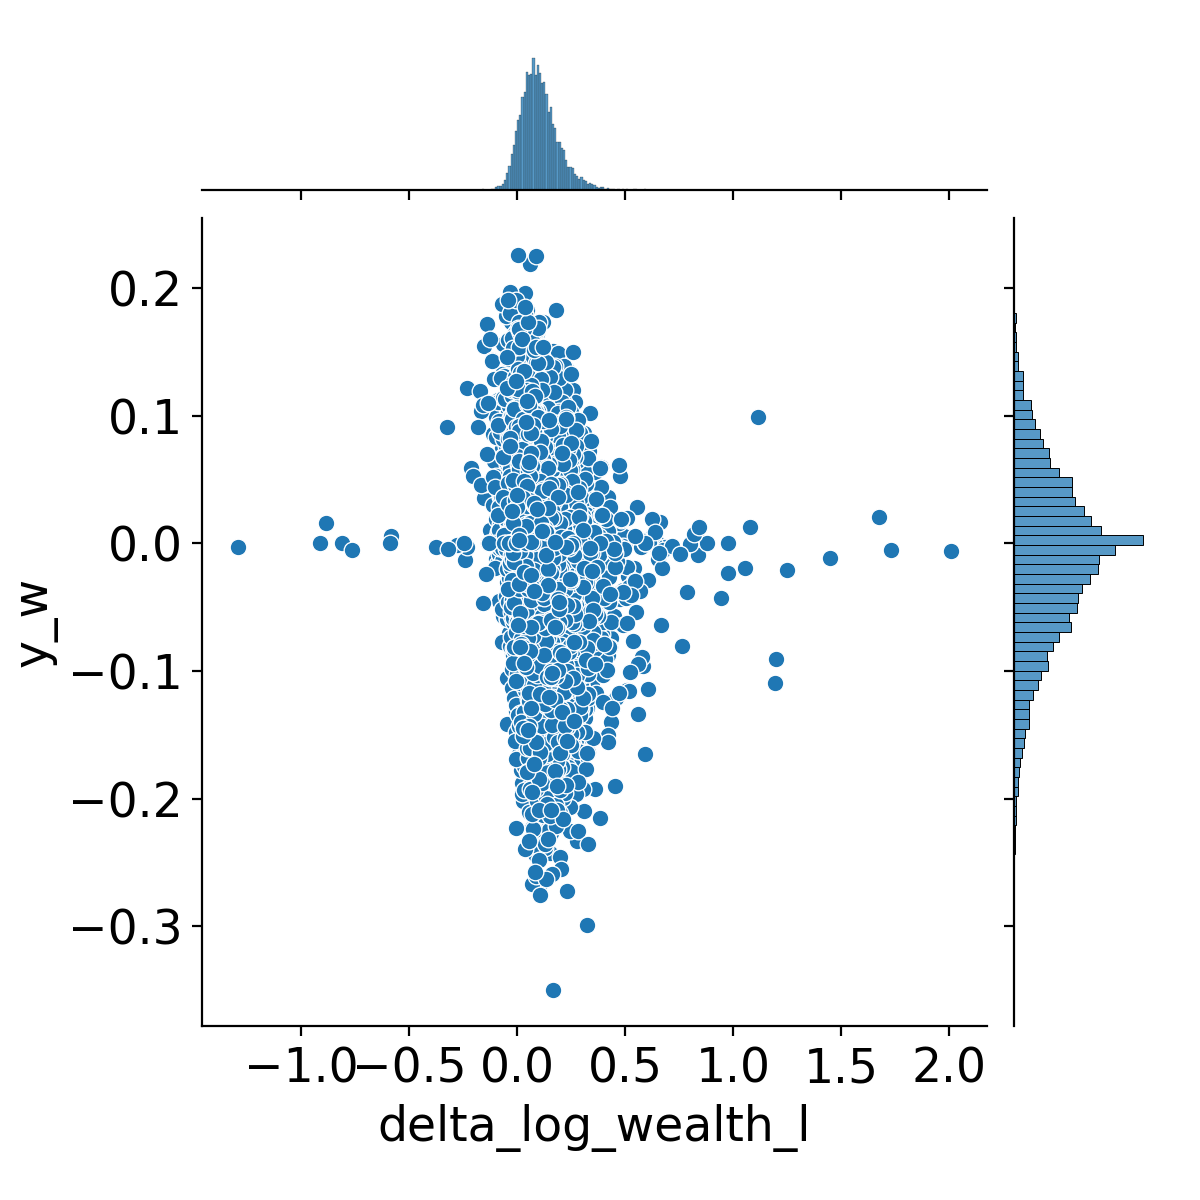

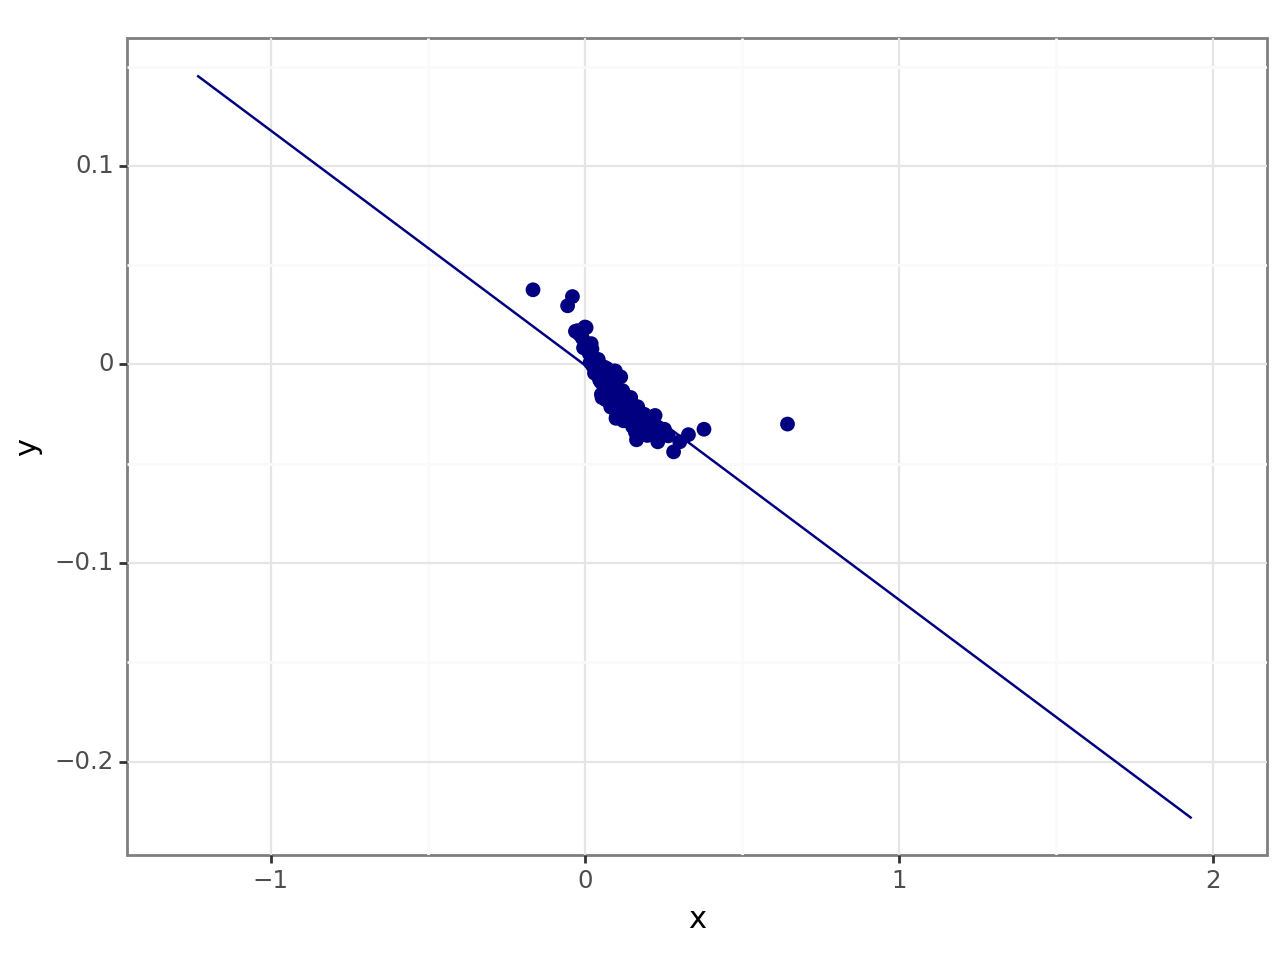


delta_log_wealth_l2


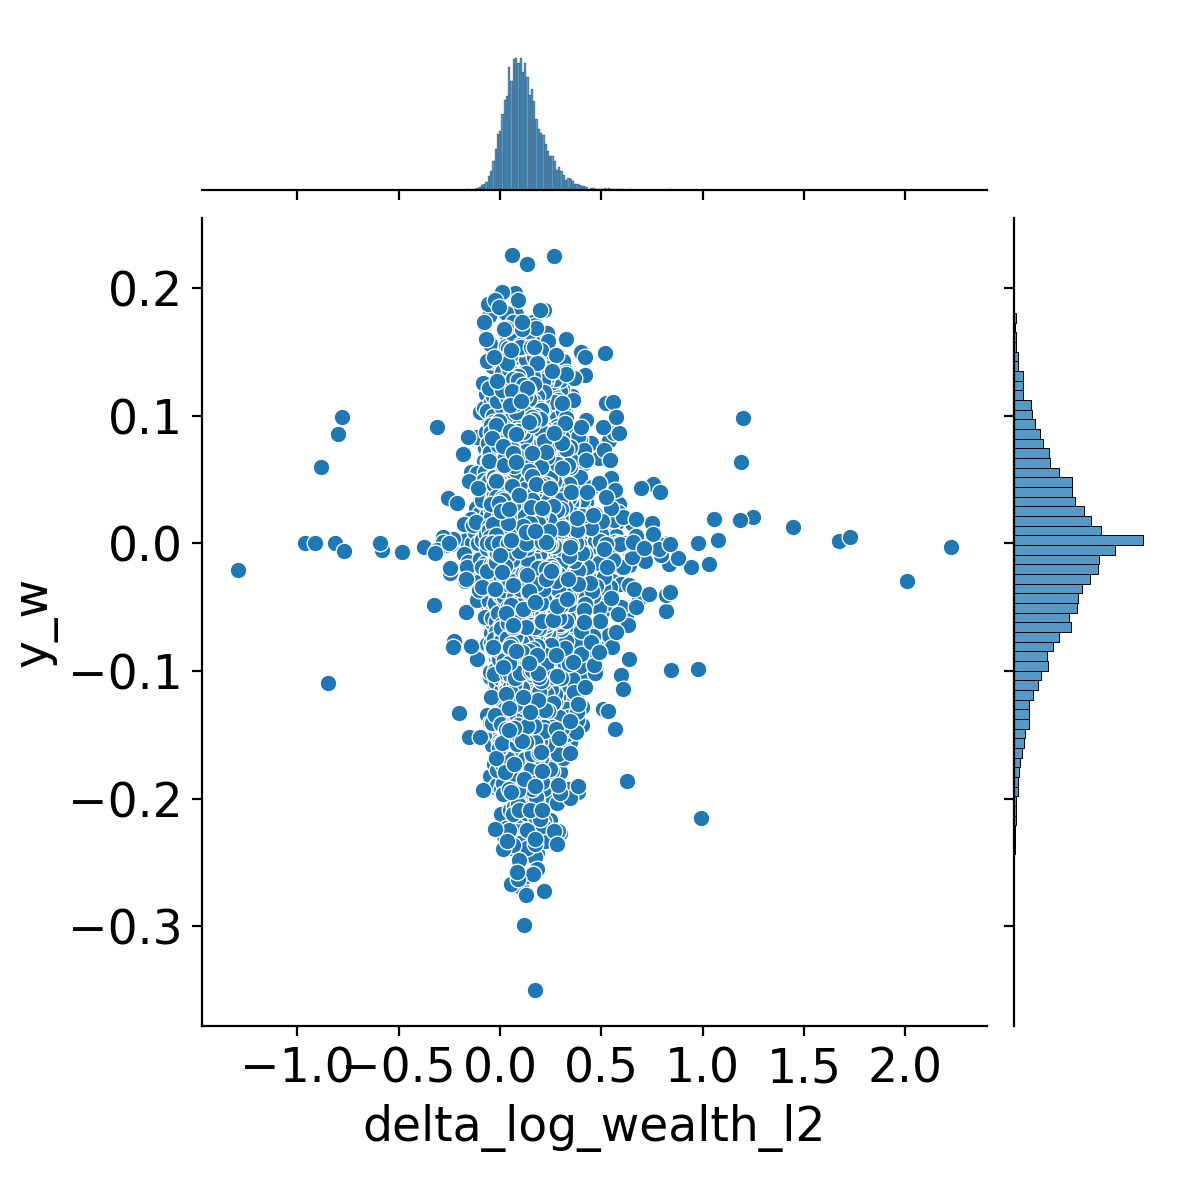

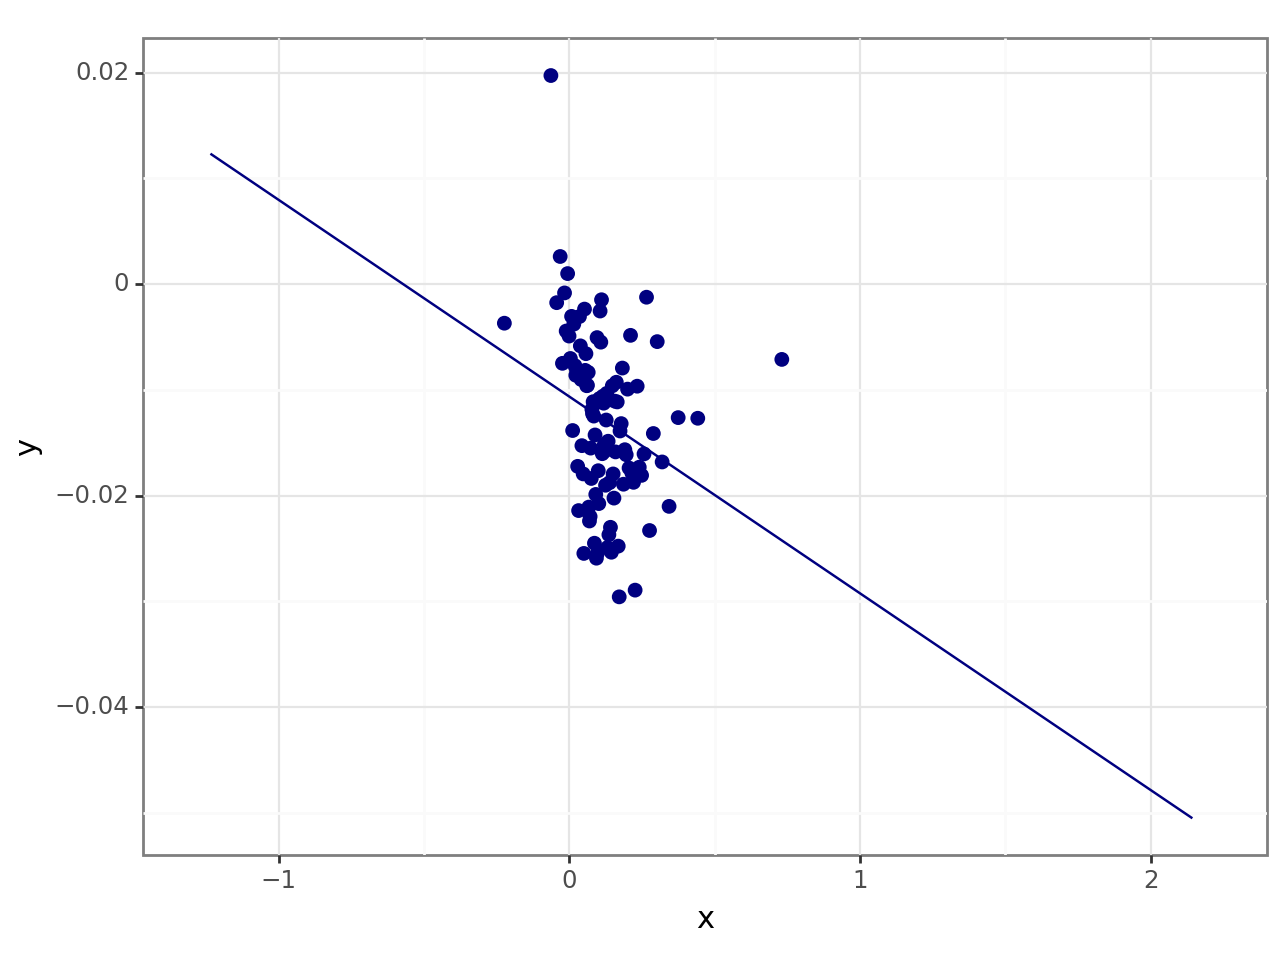

In [4]:
#CORRELATION
gender = "w"
data_regress = data
list = [f'control_part_inc_{gender}','control_cons','delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l',  'wage_shock','wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2','BMI','BMI_l','BMI_l2','BMI_j','BMI_j_l','BMI_j_l2','delta_log_wealth_l','delta_log_wealth_l2']
list = [f'control_part_inc_{gender}','control_cons','delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l',  'wage_shock','wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2','delta_log_wealth_l','delta_log_wealth_l2']

#list = ['wage_shock','wage_shock_j','delta_log_barganing_l']

#summary = data_regress[['delta_log_barganing']].describe()

for i in list:
    print(f'{i}')

    joint_plot = sns.jointplot(data_regress, x=f'{i}', y=f'y_{gender}')
    #joint_plot.fig.savefig(f'output/bargaining_x{i}_plot{model_name}_{gender}.png')
    #binspos='es' #like this equal spread does not work properly
    est = binsreg(data_regress[f'y_{gender}'],data_regress[f'{i}'], nbins=100, polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY
  





In [5]:

#MED KOTNROLLER LAV DEN
#est = binsreg(data_regress['delta_log_barganing'],data_regress[f'{i}'],  nbins=100,polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY
#est = binsreg(data_regress['delta_log_barganing'],data_regress[f'{i}'], w=list2, nbins=100,polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY



In [6]:
#UDEN 0
#if name != "model_FC":
#    data_regress = data
#    data_regress = data_regress[data_regress['delta_log_barganing']< 0.5]
#    data_regress = data_regress[data_regress['delta_log_barganing']> -0.5]
#    data_regress = data_regress[data_regress['delta_log_barganing']!= 0]


#    for i in list:
#        print(f'{i}')
#
#        joint_plot = sns.jointplot(data_regress, x=f'{i}', y=f'delta_log_barganing')
        #joint_plot.fig.savefig(f'output/bargaining_x{i}_plot{model_name}_{gender}_restrict.png')
        #binspos='es' #like this equal spread does not work properly
#        est = binsreg(data_regress['delta_log_barganing'],data_regress[f'{i}'], nbins=100,polyreg=1, noplot=False) #CANNOT GET TO SAVE AUTOMATICALLY


#relationen bliver meget mindre kraftigt, for 0 --> trækker mode at ting bliver insignifikante selv i LC,

c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\Anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
c:\Users\czk481\project\LimitedCommitmentTest-1\Estimate.py:246: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
c:\Users\czk481\project\LimitedCommitmentTe

                            OLS Regression Results                            
Dep. Variable:                    y_w   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     8098.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:35:15   Log-Likelihood:                 17434.
No. Observations:                5911   AIC:                        -3.483e+04
Df Residuals:                    5890   BIC:                        -3.469e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0061    

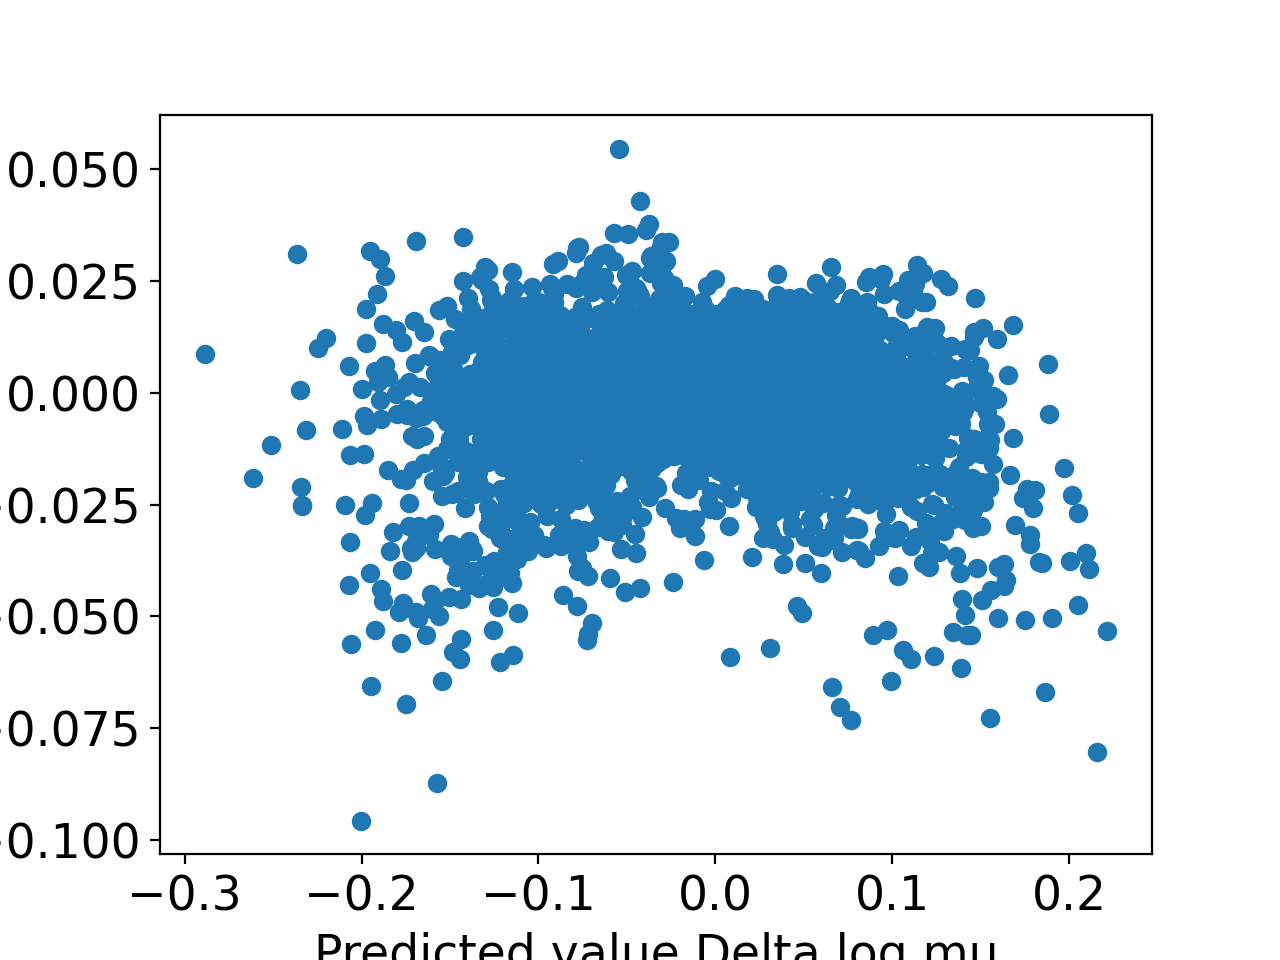

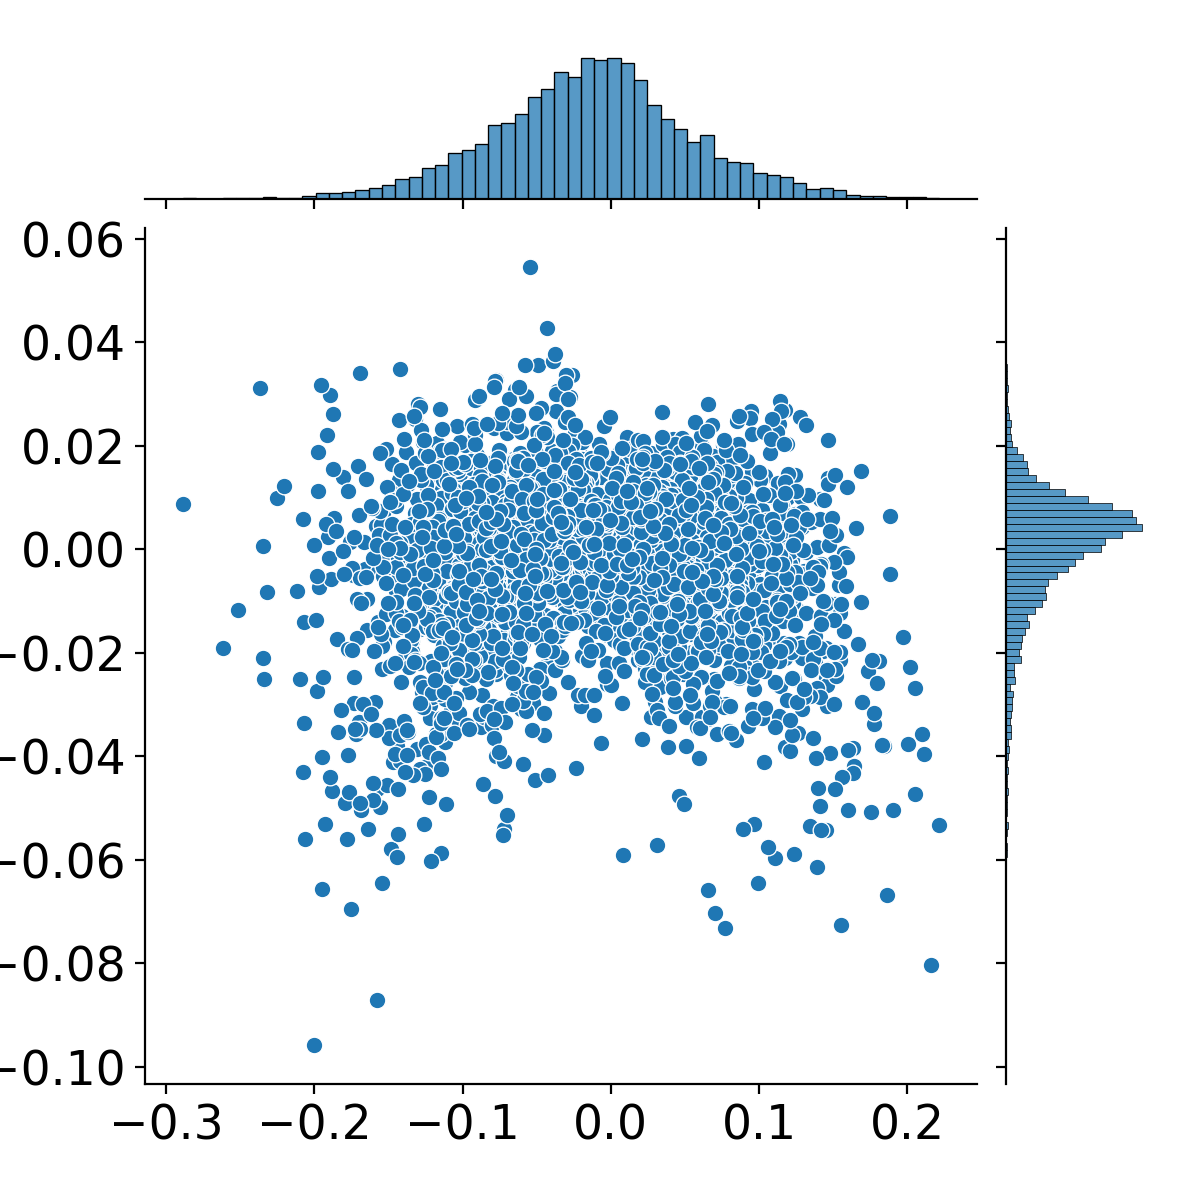

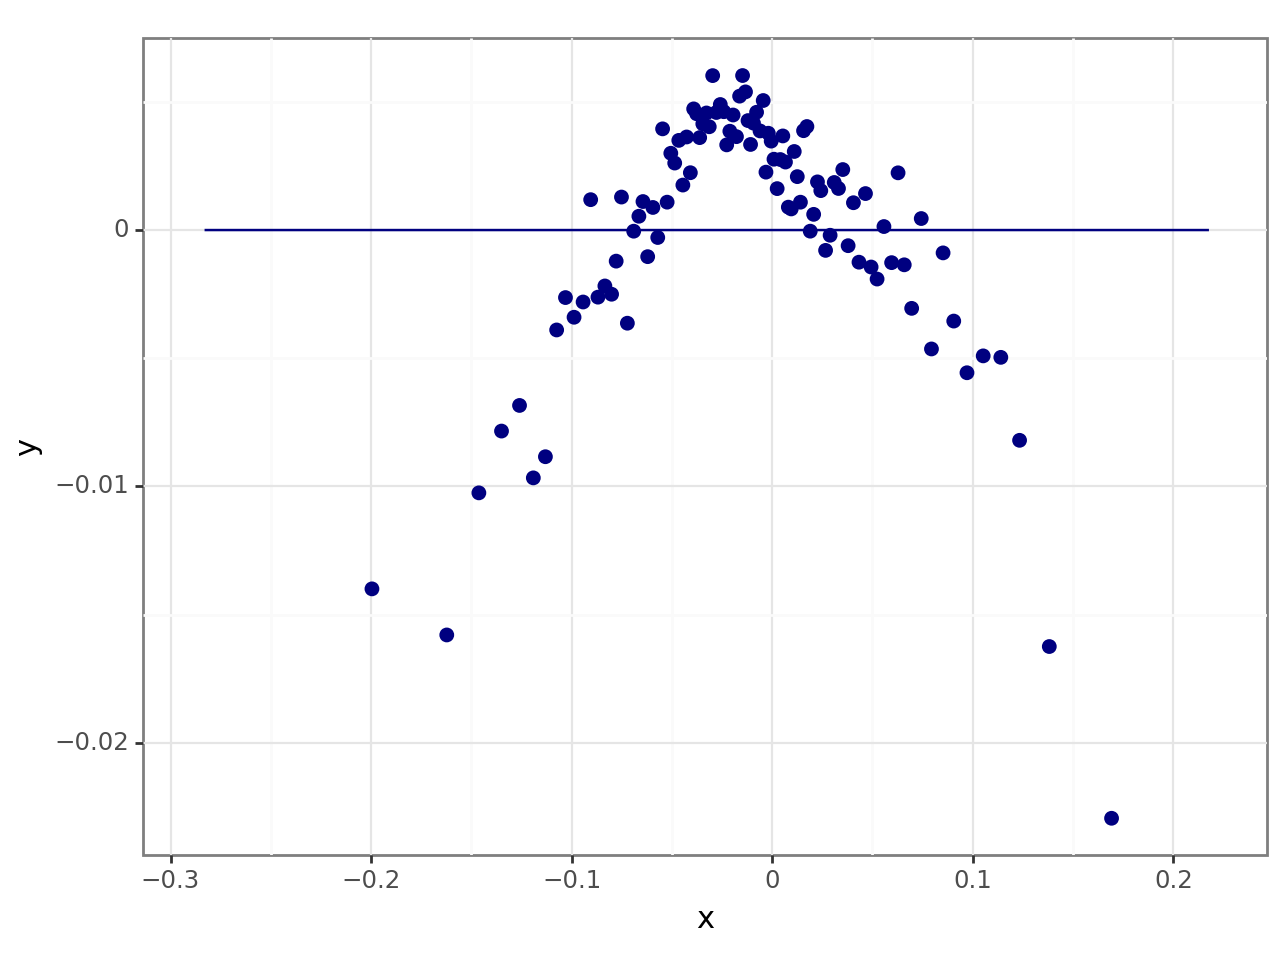

c:\Users\czk481\Anaconda3\lib\site-packages\plotnine\scales\scales.py:50: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

c:\Users\czk481\Anaconda3\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\czk481\Anaconda3\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: output/hours_res_predict_plot_model_FC_w_binned_scatter.png


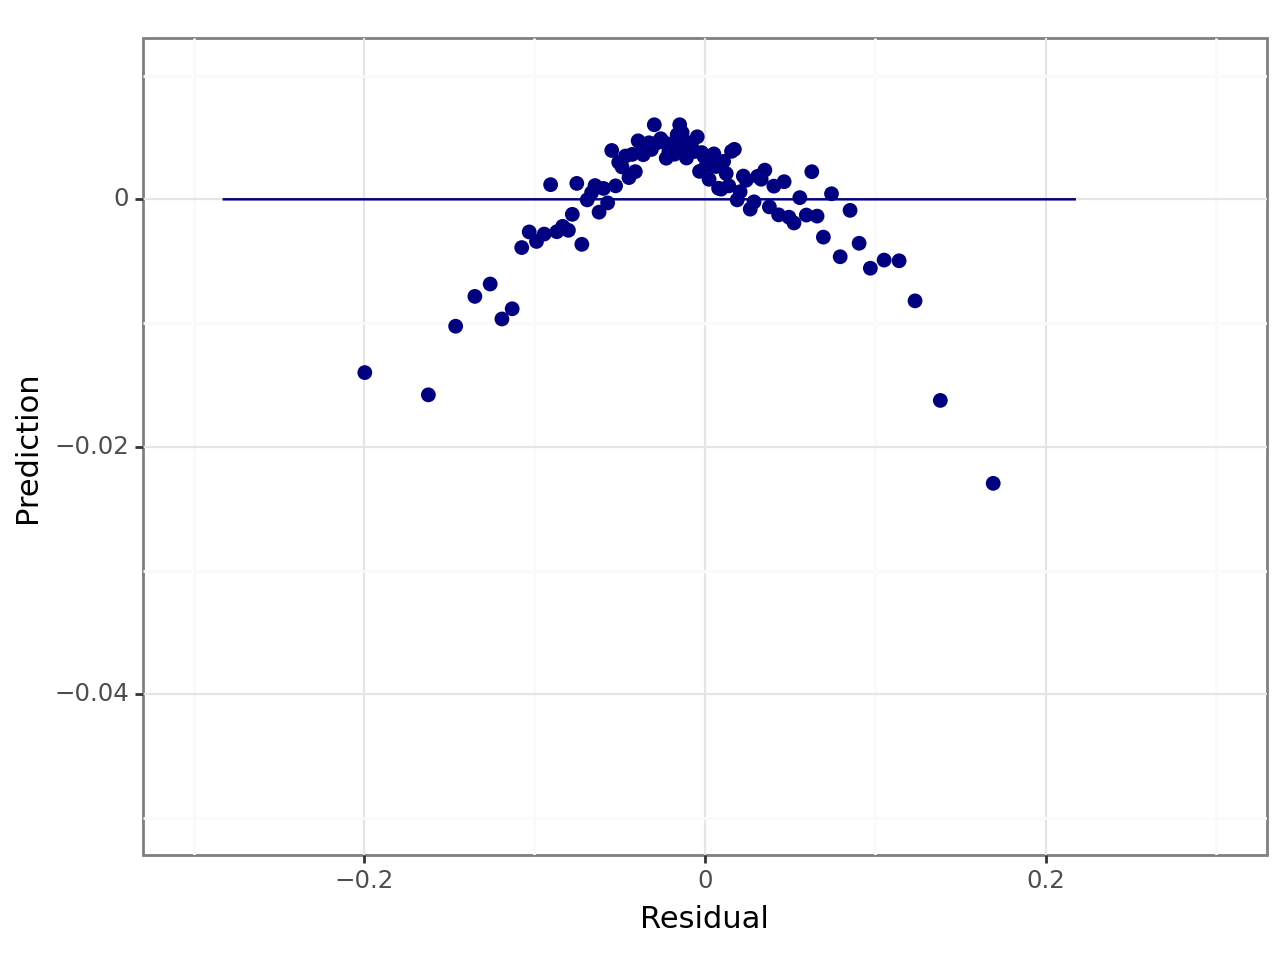


<F test: F=528.8753425924718, p=5.806447062982429e-212, df_denom=5.89e+03, df_num=2>
wage_shock_l


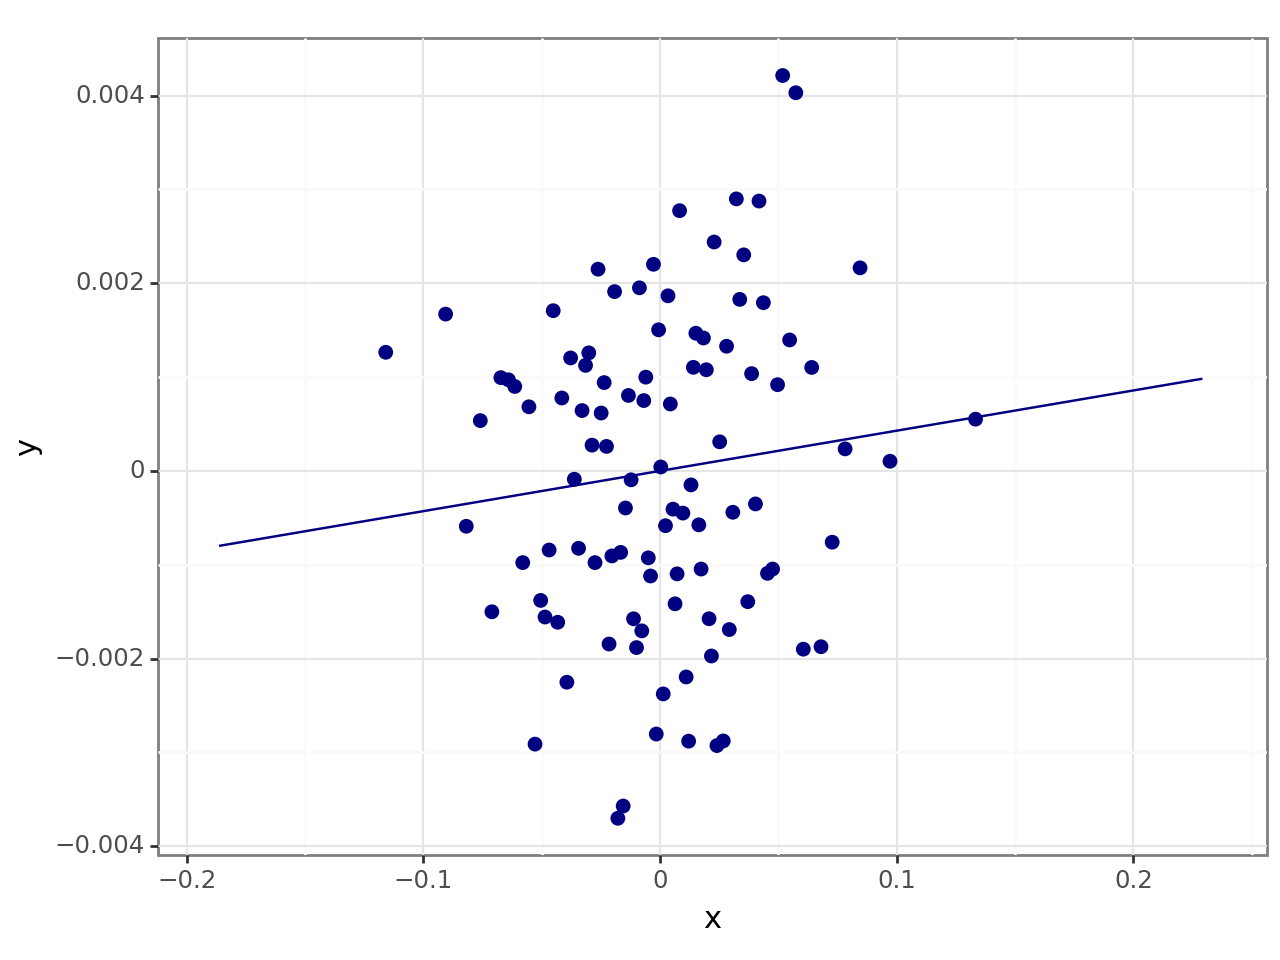


wage_shock_l2


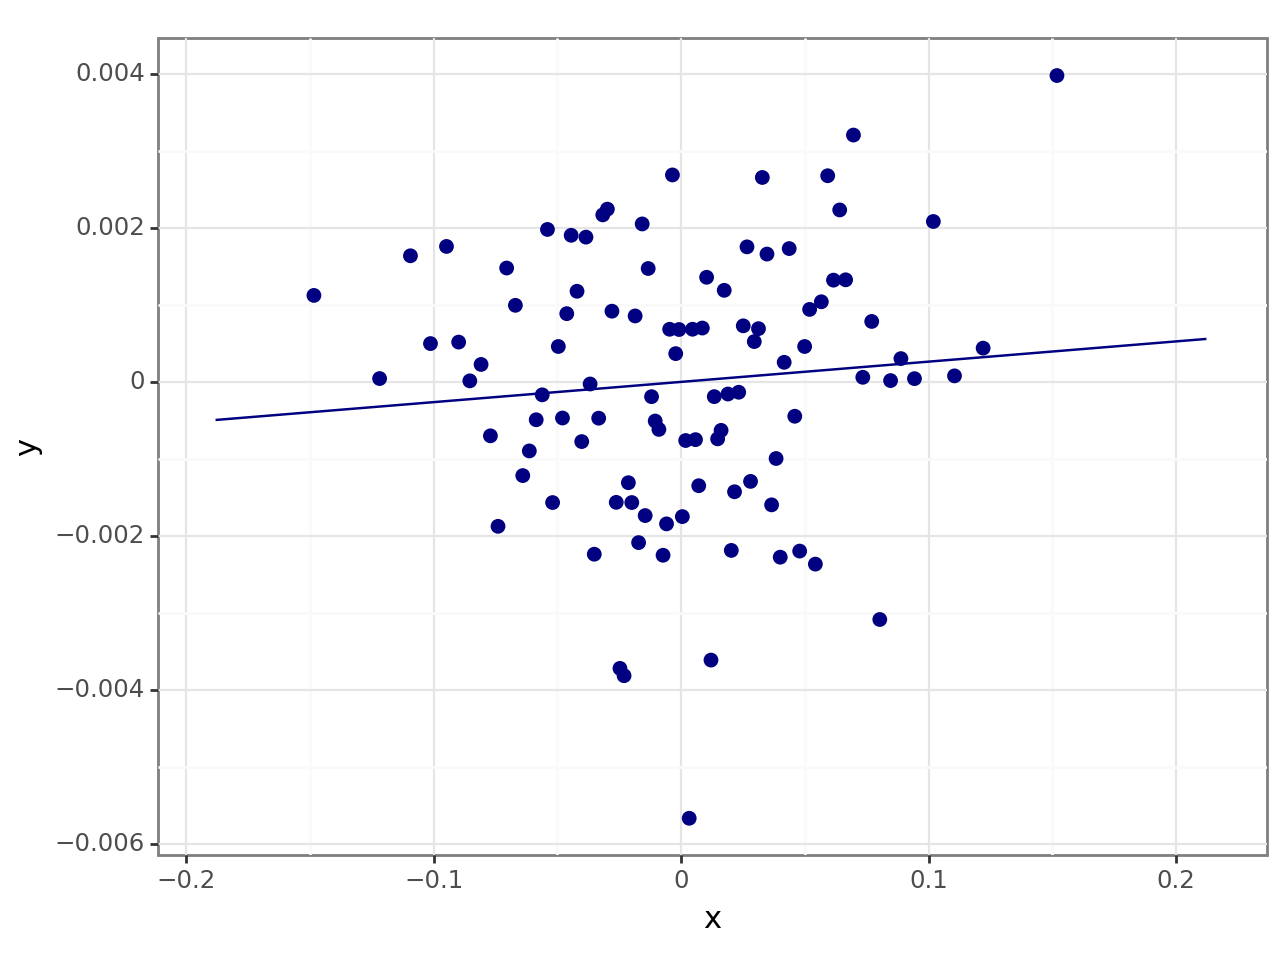


wage_shock_j


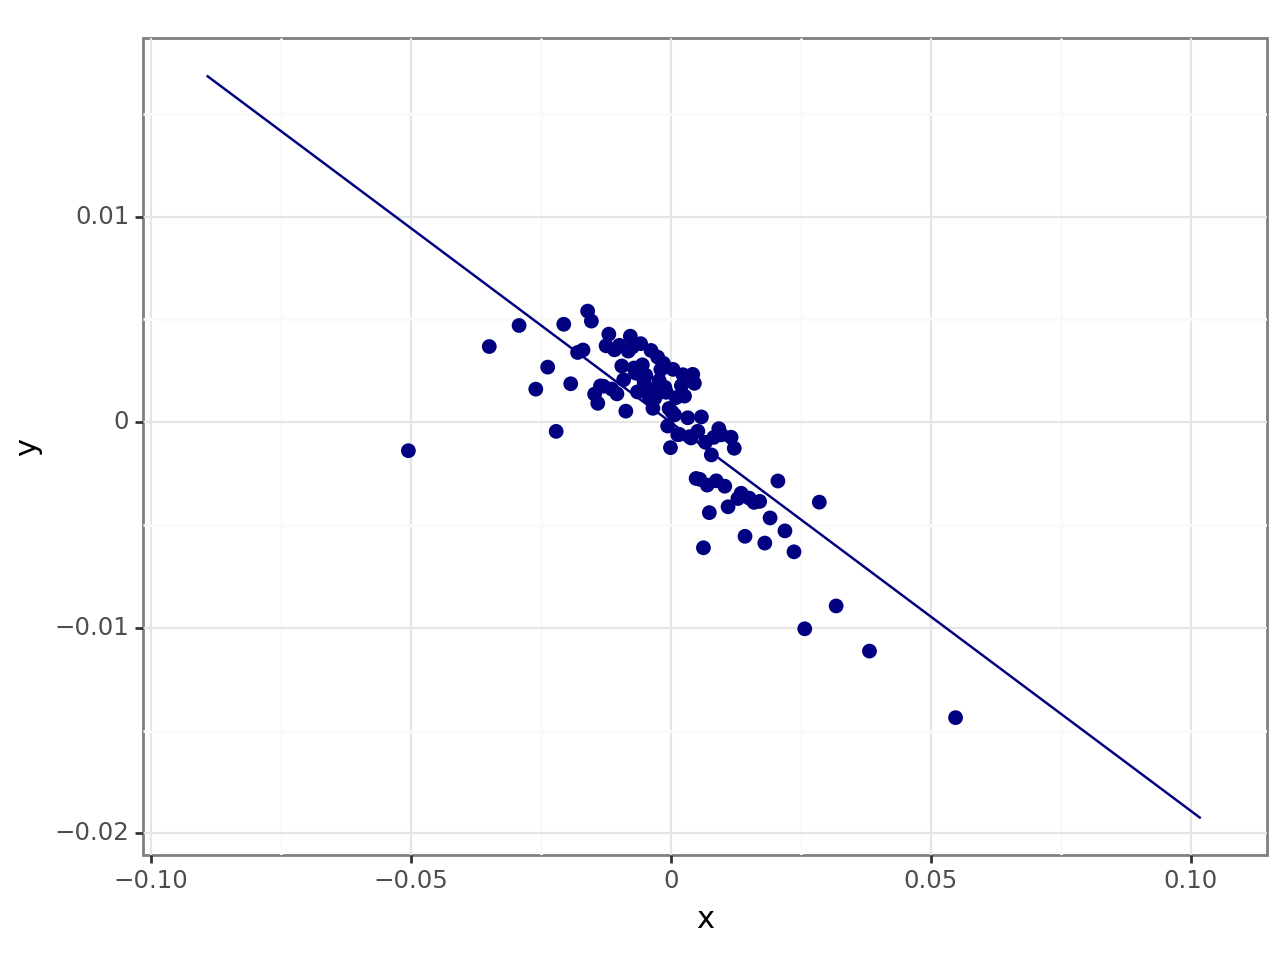


wage_shock_j_l


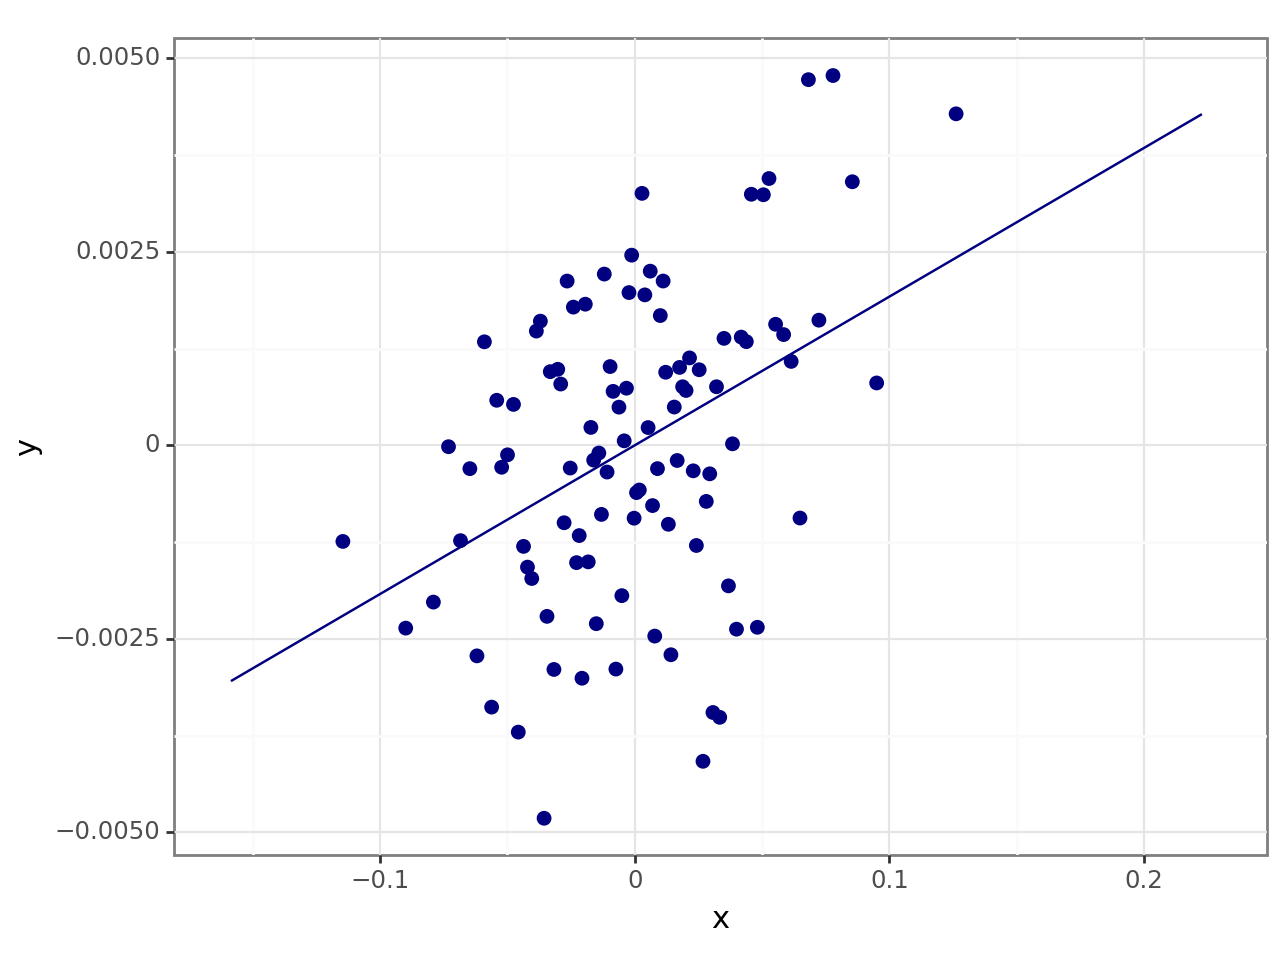


wage_shock_j_l2


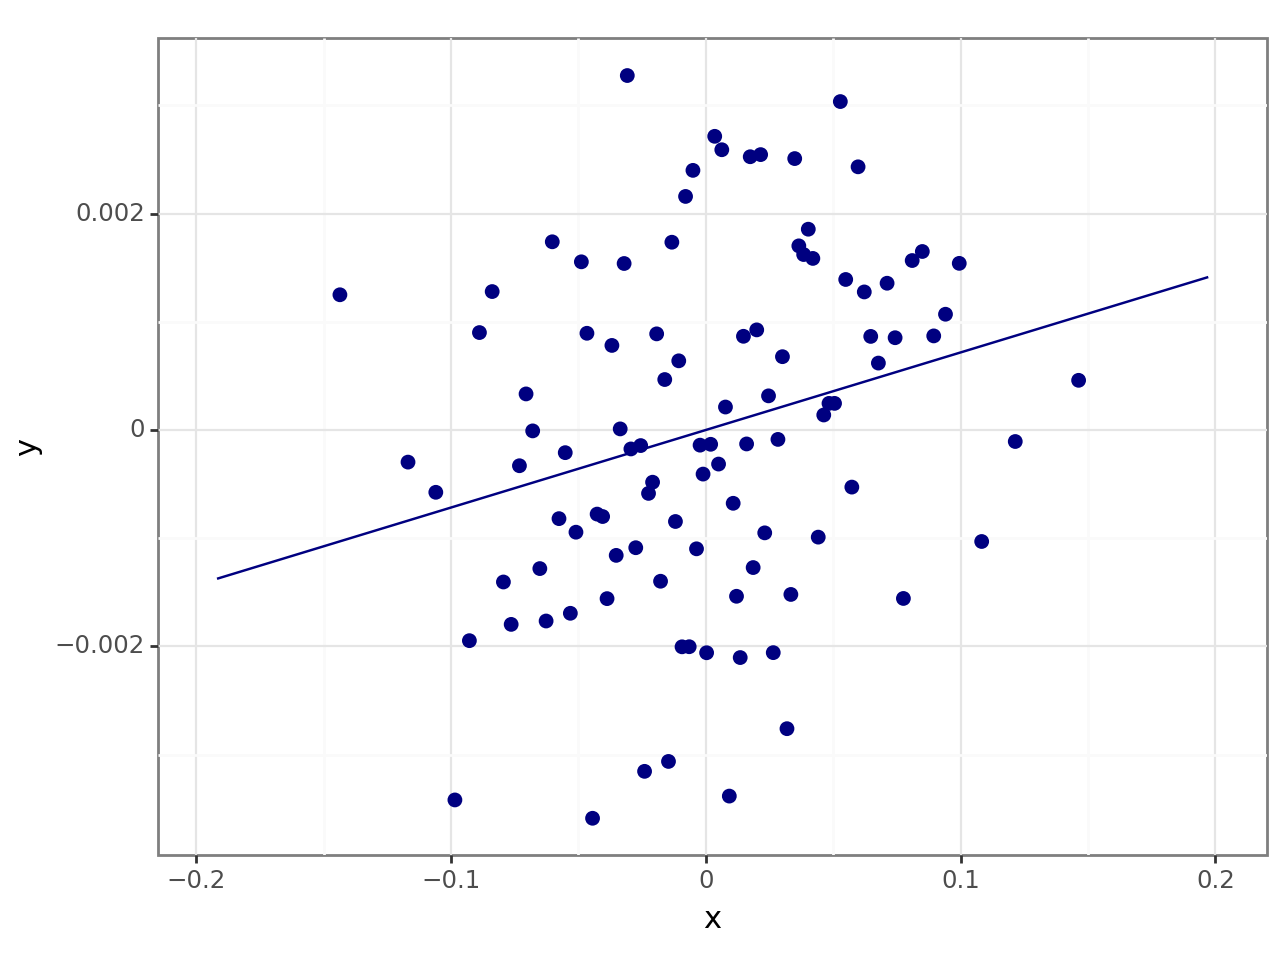

In [11]:
data = Estimate.create_data(model,start_p = 2, end_p = model.par.T-2, yerror = do_distr_yerror, scale_st = do_yerror )
data = Estimate.create_variable(data, model.par)
data = Estimate.aux_est(data,model.par)


nonP = 1
#HOURS, final regression 
gender = "w"
#Find the gender and the gender of the spouse
if gender == "w":
    spouse = "m"
elif gender =='m':
    spouse = "w"

  
data['wage_shock']=data[f'omega_res_{gender}']
data['wage_shock_l']=data[f'omega_res_{gender}_l']
data['wage_shock_l2']=data[f'omega_res_{gender}_l2']
data['wage_shock_j']=data[f'omega_res_{spouse}']
data['wage_shock_j_l']=data[f'omega_res_{spouse}_l']
data['wage_shock_j_l2']=data[f'omega_res_{spouse}_l2']
    

data_regress = data[['t','delta_lag_log_fam_inc','delta_lag_log_wealth',f'inc_share_{spouse}_l',f'delta_log_earnings_{spouse}','cons_l','delta_log_cons','init_barg','log_earnings_w', 'log_earnings_m','log_earnings_w_l', 'log_earnings_m_l', 'log_wealth', 'wealth_F',  f'y_{gender}', 'idx', 'wage_shock','wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2','delta_log_BMI_w','delta_log_BMI_w_l','delta_log_BMI_w_l2','delta_log_BMI_m','delta_log_BMI_m_l','delta_log_BMI_m_l2',f'control_part_inc_{gender}','control_cons','delta_log_wealth','delta_log_wealth_l','delta_log_wealth_l2','delta_log_Love','delta_log_Love_l','delta_log_Love_l2','delta_log_fam_inc', 'log_fam_inc' , 'log_fam_inc_l', 'log_fam_inc_l2', 'log_wealth_l', 'log_wealth_l2']]

  
data['BMI'] = data[f'delta_log_BMI_{gender}']
data['BMI_l'] = data[f'delta_log_BMI_{gender}_l']
data['BMI_l2'] = data[f'delta_log_BMI_{gender}_l2']
data['BMI_j'] = data[f'delta_log_BMI_{spouse}']
data['BMI_j_l'] = data[f'delta_log_BMI_{spouse}_l']
data['BMI_j_l2'] = data[f'delta_log_BMI_{spouse}_l2']


#DROP NAN
data_regress = data_regress.dropna() # det ser ud som om den ikke fjerner nogen

#PREPARE T
X_t=pd.get_dummies(data_regress[['t', 'init_barg']], columns = ['t','init_barg'], prefix = ['D_t','D_init_barg'], dtype = float) 
#X_t=pd.get_dummies(data['t''init_barg'], columns = ['t'], prefix = 'D_t', dtype = float, drop_first=True,  ) 
X_t = X_t.drop(columns = ['D_t_13','D_init_barg_1']) #drop reference cat

if nonP == 1:
    #baseline
     
    #consumption
    cons = data_regress[['control_cons']]
    #earnings_inc

    inc_share = data_regress[[f'control_part_inc_{gender}']]
                             
    #SHADOW VALUE: 
    Shadow_value = data_regress[['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']]

    #wealth and love
    Wealth_and_Love = data_regress[['delta_log_wealth_l','delta_log_wealth_l2']]
if nonP ==2: 
    #detailed shadow 

    #consumption
    cons = data_regress[['control_cons']]
    #earnings_inc
    inc_share = data_regress[[f'control_part_inc_{gender}'] ]               
    #shadow
    Shadow_value = data_regress[['t']]
    cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']
    
    for i in cat:
        Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l'], drop_first = True, dtype = float)


    #Drop if less than two
    Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
    Shadow_value = Shadow_value.drop(columns = ['t'])    

    #wealth and love
    Wealth_and_Love = data_regress[['delta_log_wealth_l','delta_log_wealth_l2']]

if nonP ==3: 
    #nonP all

     #consumption
    cons = data_regress[['t']]
    cat = ['control_cons',]
    
    for i in cat:
        cons[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    cons = pd.get_dummies(cons, columns=['control_cons'], drop_first = True, dtype = float)
    #Drop if less than two
    cons = cons.loc[:,(cons.sum()>2 )]
    cons = cons.drop(columns = ['t'])

    #earnings_inc
    inc_share = data_regress[['t']]
        
    cat = [f'control_part_inc_{gender}',]
    
    for i in cat:
        inc_share[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    inc_share = pd.get_dummies(inc_share, columns=[f'control_part_inc_{gender}' ], drop_first = True, dtype = float)

    #Drop if less than two
    inc_share = inc_share.loc[:,(inc_share.sum()>2 )]
    inc_share = inc_share.drop(columns = ['t'])   

    #shadow
    Shadow_value = data_regress[['t']]
    cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l']
    
    for i in cat:
        Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l'], drop_first = True, dtype = float)


    #Drop if less than two
    Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
    Shadow_value = Shadow_value.drop(columns = ['t'])    

    #wealth and love
    Wealth_and_Love = data_regress[['t']]
    cat = ['delta_log_wealth_l','delta_log_wealth_l2']
     
    for i in cat:
        Wealth_and_Love[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    
    Wealth_and_Love = pd.get_dummies(Wealth_and_Love, columns=['delta_log_wealth_l','delta_log_wealth_l2'], drop_first = True, dtype = float)


    #Drop if less than two
    Wealth_and_Love = Wealth_and_Love.loc[:,(Wealth_and_Love.sum()>2 )]
    Wealth_and_Love = Wealth_and_Love.drop(columns = ['t'])


if nonP ==4: 
    #non P all + interact
    
    #consumption
    cons = data_regress[['t']]
    cat = ['control_cons','cons_l','delta_log_cons']
    
    for i in cat:
        cons[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    cons = pd.get_dummies(cons, columns=['control_cons','cons_l','delta_log_cons'], drop_first = True, dtype = float)
    #Drop if less than two
    cons = cons.loc[:,(cons.sum()>2 )]
    cons = cons.drop(columns = ['t'])

    #earnings_inc
    inc_share = data_regress[['t']]
    cat = [f'control_part_inc_{gender}', f'inc_share_{spouse}_l', f'delta_log_earnings_{spouse}']
    
    for i in cat:
        inc_share[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    inc_share = pd.get_dummies(inc_share, columns=[f'control_part_inc_{gender}',f'inc_share_{spouse}_l',f'delta_log_earnings_{spouse}' ], drop_first = True, dtype = float)


    #Drop if less than two
    Shadow_value = data_regress[['t']]
    cat = ['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l','delta_lag_log_fam_inc','delta_lag_log_wealth']
    
    for i in cat:
        Shadow_value[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    Shadow_value = pd.get_dummies(Shadow_value, columns=['delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l' ,'delta_lag_log_fam_inc','delta_lag_log_wealth'], drop_first = True, dtype = float)


    #Drop if less than two
    Shadow_value = Shadow_value.loc[:,(Shadow_value.sum()>2 )]
    Shadow_value = Shadow_value.drop(columns = ['t'])

    #wealth and love
    Wealth_and_Love = data_regress[['t']]
    cat = ['delta_log_wealth_l','delta_log_wealth_l2']
        
    for i in cat:
        Wealth_and_Love[i] = pd.qcut(data_regress[i], 50, labels = False, duplicates='raise') 

    
    Wealth_and_Love = pd.get_dummies(Wealth_and_Love, columns=['delta_log_wealth_l','delta_log_wealth_l2'], drop_first = True, dtype = float)


    #Drop if less than two
    Wealth_and_Love = Wealth_and_Love.loc[:,(Wealth_and_Love.sum()>2 )]
    Wealth_and_Love = Wealth_and_Love.drop(columns = ['t'])

 

df = data_regress.drop(columns = ['t','delta_lag_log_fam_inc','delta_lag_log_wealth','init_barg',f'inc_share_{spouse}_l','cons_l','delta_log_cons','control_cons','delta_log_Love','delta_log_Love_l','delta_log_Love_l2', f'control_part_inc_{gender}', f'delta_log_earnings_{spouse}', 'log_earnings_w', 'log_fam_inc' , 'log_earnings_m','log_earnings_w_l', 'log_earnings_m_l', 'log_wealth', 'wealth_F',  f'y_{gender}', 'idx','delta_log_fam_inc', 'log_fam_inc_l', 'log_wealth_l', 'log_fam_inc_l2', 'log_wealth_l2', 'delta_log_wealth', 'delta_log_wealth_l','delta_log_wealth_l2','delta_log_BMI_w','delta_log_BMI_w_l','delta_log_BMI_w_l2','delta_log_BMI_m','delta_log_BMI_m_l','delta_log_BMI_m_l2'])
      

#REGRESS
y  = data_regress[f'y_{gender}']
x1 = pd.concat([df,  X_t , Shadow_value, inc_share, cons, Wealth_and_Love], axis=1 )
#x = x.T.drop_duplicates().T #drop duplicates
x1 = sm.add_constant(x1)  
#result = sm.OLS(y,x).fit() 

result2 = sm.OLS(y,x1).fit()
print(result2.summary())
res = result2.resid
predict = result2.predict()
data_regress['res'] = res
data_regress['predict'] = predict
params = result2.params

print('residual plot')
plt.scatter(predict,res)
plt.ylabel("Residual Delta log mu")
plt.xlabel(f'Predicted value Delta log mu')

#plt.savefig(f'output/barg_res_predict_plot{model_name}_{gender}.png')
plt.show()
joint_plot = sns.jointplot(data_regress, x=predict, y=res)
est = binsreg(res,predict, nbins=100,polyreg=1, noplot=False) 
est.bins_plot += labs(x="Residual", y = "Prediction")
est.bins_plot += ylim(-0.05, 0.01)
est.bins_plot += xlim(-0.3, 0.3)
#print(est)
est.bins_plot.save(f"output/hours_res_predict_plot_{model_name}_{gender}_binned_scatter.png")
print(est.bins_plot)

#RESET TEST: 
reset_test = reset_ramsey(result2, degree =3)
print(reset_test)

#print(est.data_plot)


#plt.xlabel('New x')
#est.set_ylabel('New Y')
#est.ylim(-0.05,0.01)
#est.savefig('test.png')
#plt.show()

#print('res against y')
#plt.scatter(data_regress[['delta_log_barganing']],res)
#plt.show()

list = [f'control_part_inc_{gender}','control_cons','delta_log_fam_inc', 'delta_log_wealth', 'log_fam_inc_l', 'log_wealth_l',  'wage_shock','wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2',  'BMI','BMI_l','BMI_l2','BMI_j','BMI_j_l','BMI_j_l2','delta_log_wealth_l','delta_log_wealth_l2']


list = ['wage_shock_l','wage_shock_l2','wage_shock_j','wage_shock_j_l','wage_shock_j_l2']



for i in list :
    

    xlabel = f'{i}'
    if i == "wage_shock":
        xlabel = "Shock to wage"
    elif i == "wage_shock_j":
        xlabel = "Shock to partners wage"
    elif i == "delta_log_barganing_l":
        xlabel = "Change in barganing weigth, lag"

    data_regress_neg = data_regress[data_regress[f'{i}']<0]
    data_regress_pos = data_regress[data_regress[f'{i}']>0]
    x = x1
    y2 = x[f'{i}']
    x = x.drop(columns = [f'{i}'])
    
    #x = x.drop(columns = list_drop)
    #x = x.T.drop_duplicates().T #drop duplicates
    x = sm.add_constant(x)  
    
    result= sm.OLS(y,x).fit()
    res_y = result.resid
    data_regress[f'res_y'] = res_y
    
    result= sm.OLS(y2,x).fit()
    res_x = result.resid
    #data_regress[[f'res_x']]=res_x


    
    #joint_plot = sns.jointplot(data_regress, x='res_x', y='res_y')
    print(f'{i}')
    est = binsreg(res_y,res_x, nbins=100,polyreg=1, noplot=False) 
    
    
  
   
